In [77]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import blob_log
from scipy.signal import find_peaks
import pandas as pd
import os
# from scipy.ndimage import gaussian_filter1d

In [78]:
# Definitions 

# --- 📁 Load all grayscale images in folder ---
def load_images(folder):
    images = []
    filenames = []
    for filename in sorted(os.listdir(folder)):
        if filename.endswith('.png') or filename.endswith('.tif'):
            img = cv2.imread(os.path.join(folder, filename), cv2.IMREAD_GRAYSCALE)
            if img is not None:
                images.append(img)
                filenames.append(filename)
    return images, filenames

# --- 📈 Radial intensity profile ---
def radial_profile(image, center, max_radius=30):
    y, x = np.indices(image.shape)
    r = np.sqrt((x - center[0])**2 + (y - center[1])**2)
    r = r.astype(np.int32)
    radial_sum = np.bincount(r.ravel(), image.ravel())
    radial_count = np.bincount(r.ravel())
    profile = radial_sum / np.maximum(radial_count, 1)
    return profile[:max_radius]

In [79]:
# PARAMETERS TO ADJUST
PIXELS_PER_MICRON = 10.24
image_folder = "C:\\Users\\laan\\Desktop\\BB slices ID5 stain"  
images, filenames = load_images(image_folder)
OVERLAY_DIR = os.path.join(image_folder, "overlays") # output directory for overlay images
os.makedirs(OVERLAY_DIR, exist_ok=True)

# Basal bodies are called donuts in the code because they have this shape in the images that you should use as input (aka the top view, 1 slice of the z-stack only!!)
# All the overlay images will be saved and the results with the number of the basal body. If you don't want to include some if the BBs from the images, you can find out which measurement it is by the index number

If USE_REFINED_CENTER = True: the minimal intensity point of the found object is taken as the center of the BB. 

If False, then the center of the object is taken as the center of the BB


🖼️ ExM_ptetWT_SR_cell10_40x_singlets_slice9.png: Detected 7 donuts.


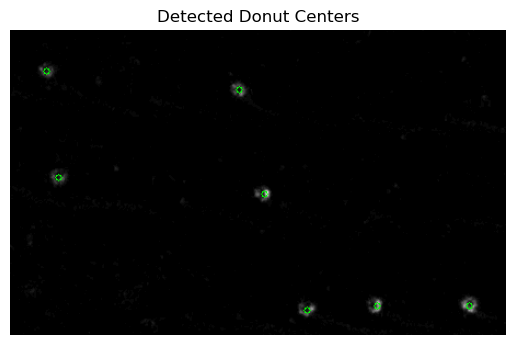

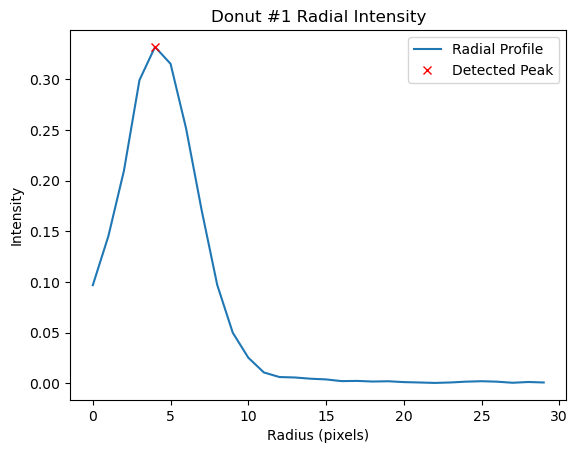

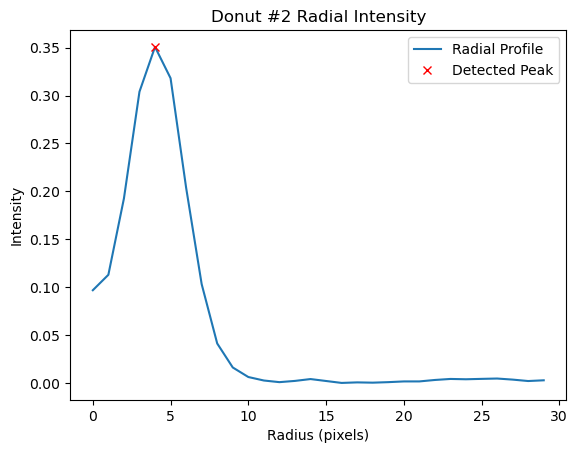

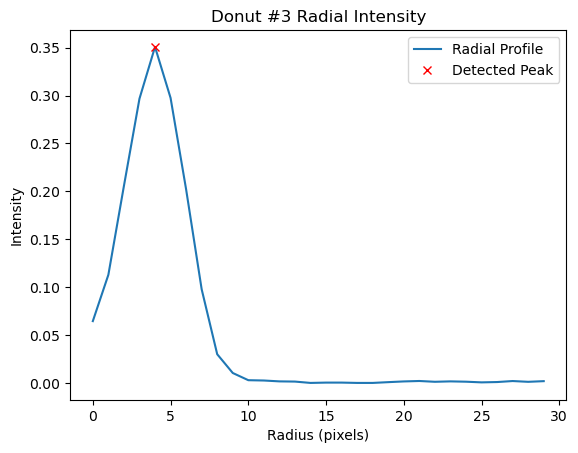

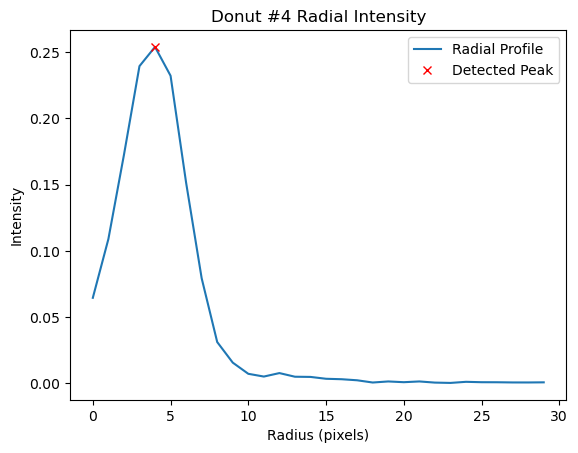

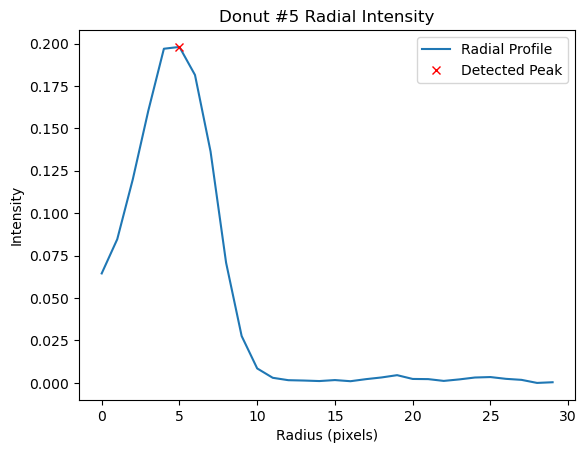

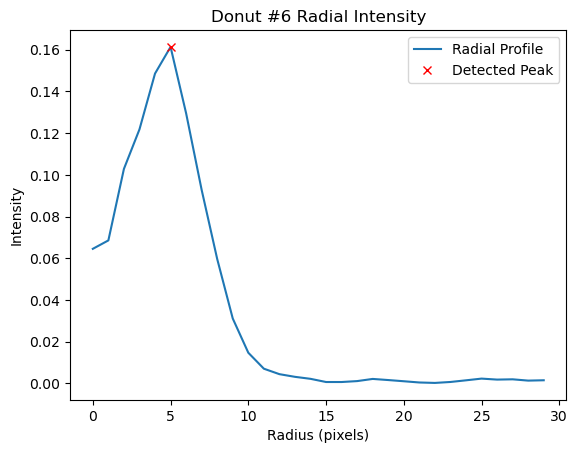

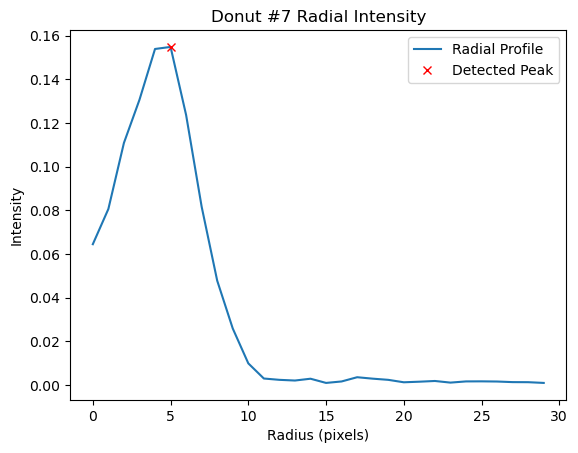

💾 Saved overlay to: C:\Users\laan\Desktop\BB slices ID5 stain\overlays\ExM_ptetWT_SR_cell10_40x_singlets_slice9_overlay.png


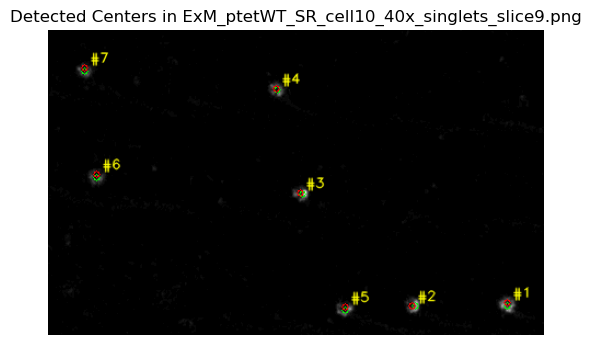

📐 Average diameter: 0.86 µm

🖼️ ExM_ptetWT_SR_cell15_40x_doublets_singlets_slice6.png: Detected 9 donuts.


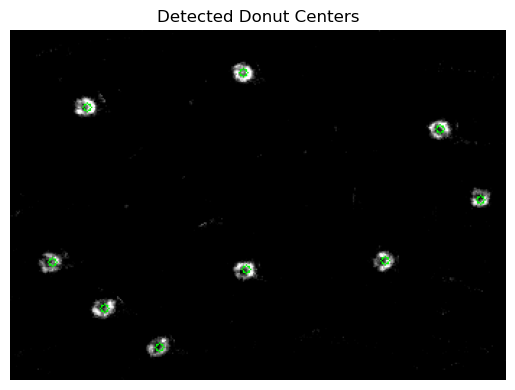

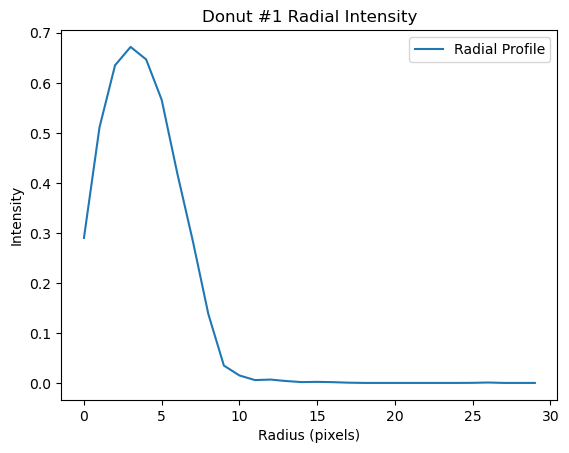

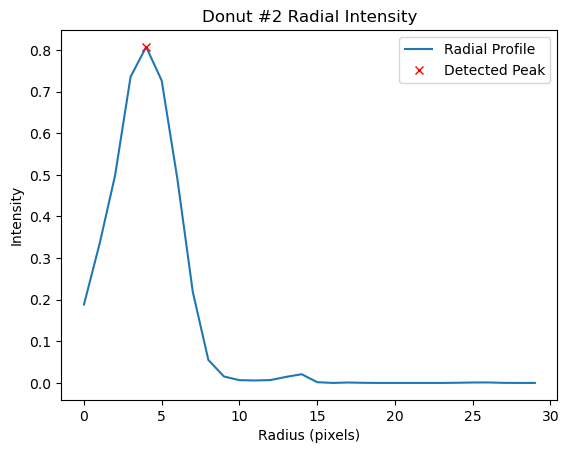

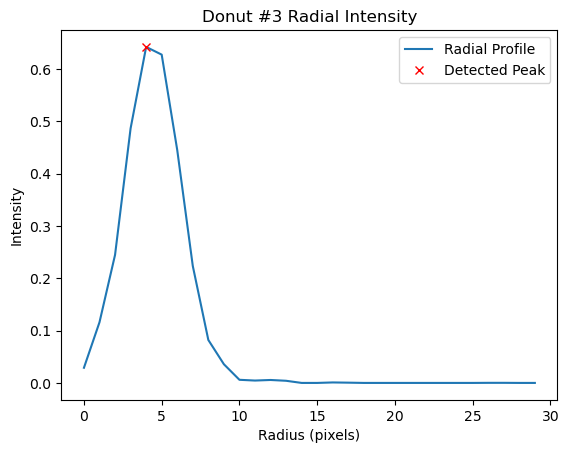

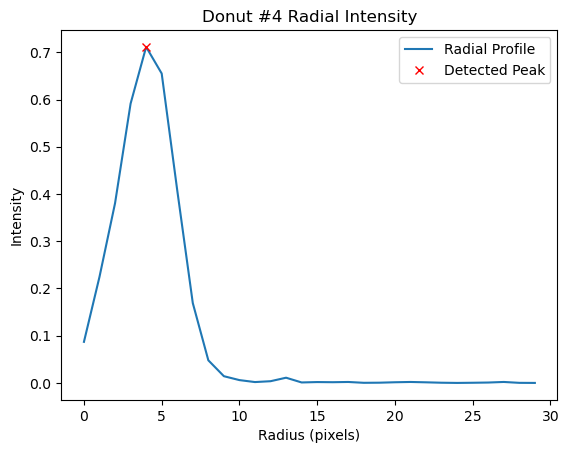

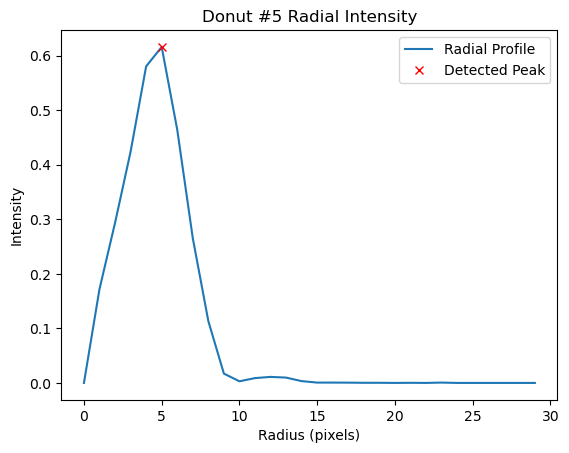

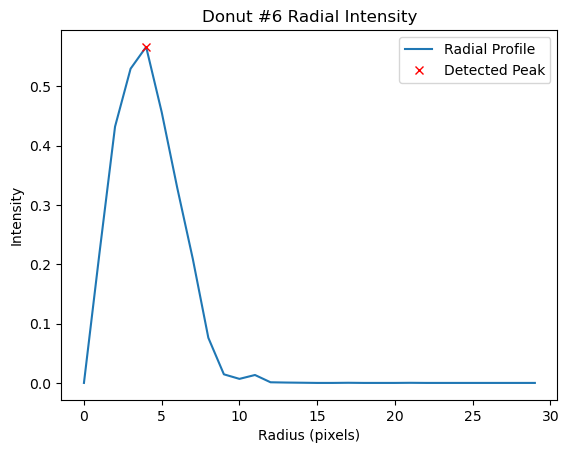

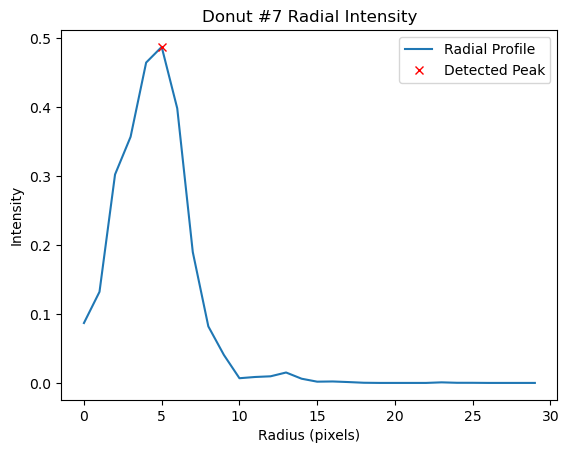

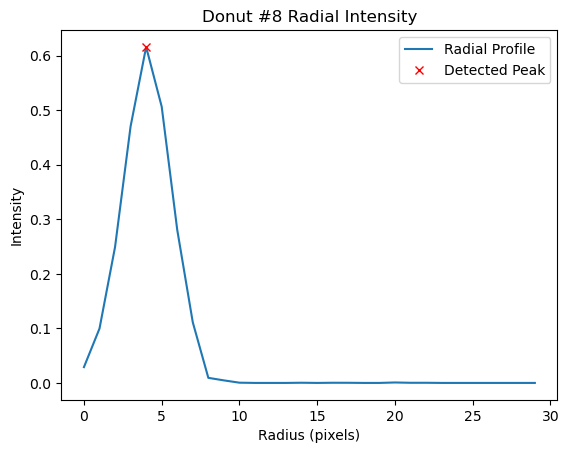

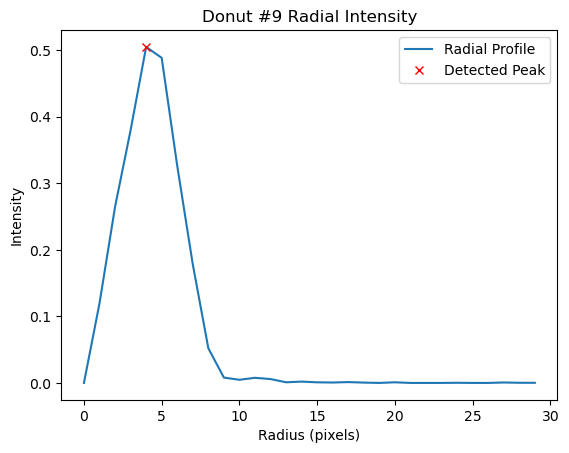

💾 Saved overlay to: C:\Users\laan\Desktop\BB slices ID5 stain\overlays\ExM_ptetWT_SR_cell15_40x_doublets_singlets_slice6_overlay.png


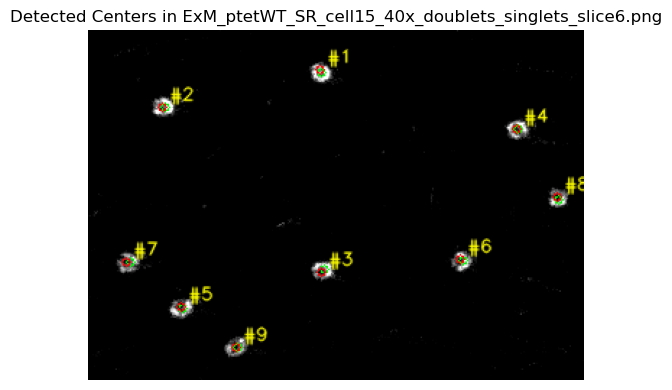

📐 Average diameter: 0.83 µm

🖼️ ExM_ptetWT_SR_cell16_40x_singlets_slice1.png: Detected 3 donuts.


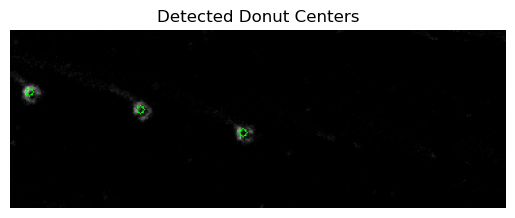

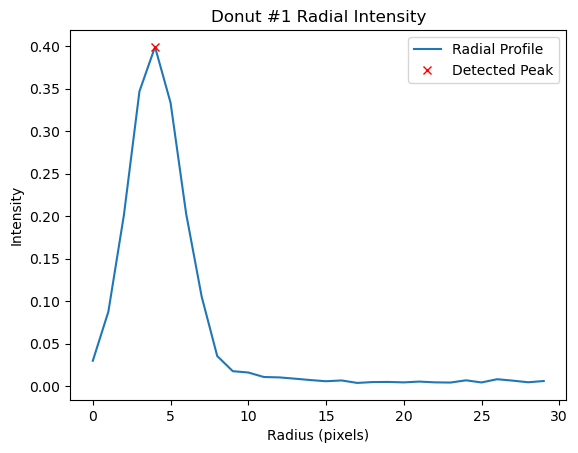

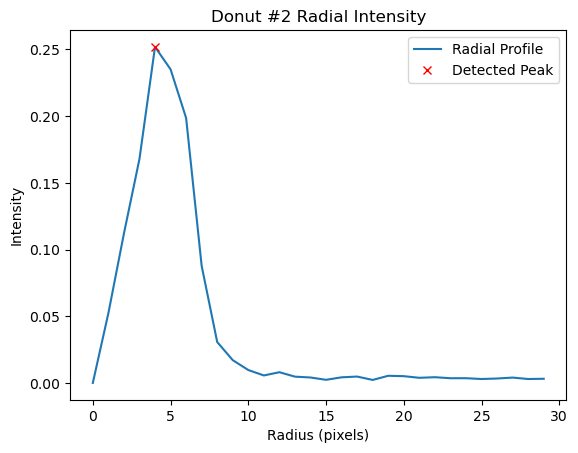

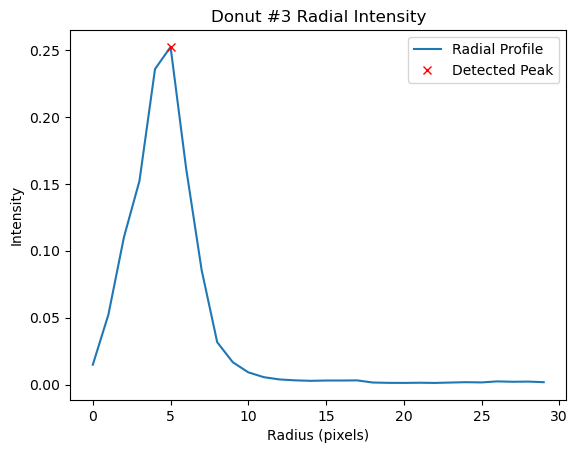

💾 Saved overlay to: C:\Users\laan\Desktop\BB slices ID5 stain\overlays\ExM_ptetWT_SR_cell16_40x_singlets_slice1_overlay.png


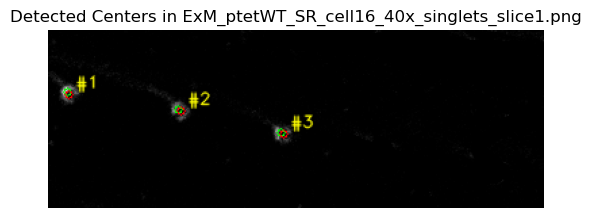

📐 Average diameter: 0.85 µm

🖼️ ExM_ptetWT_SR_cell17_40x_singlets_doublets_slice1.png: Detected 24 donuts.


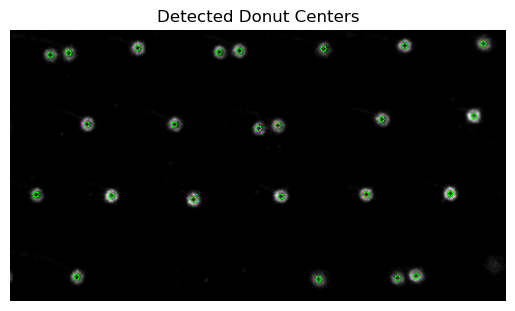

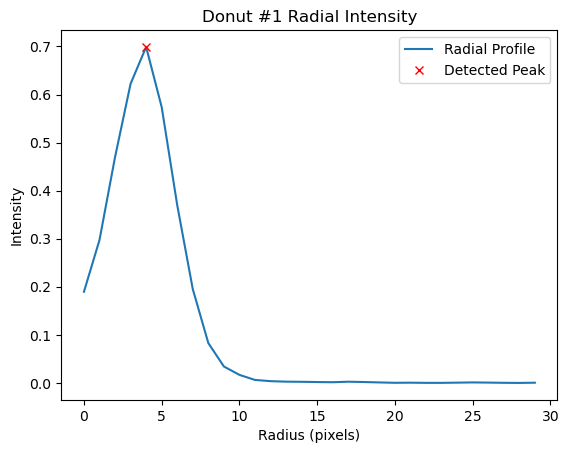

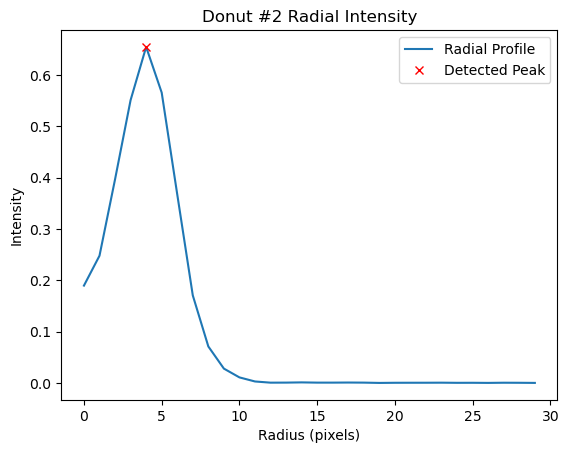

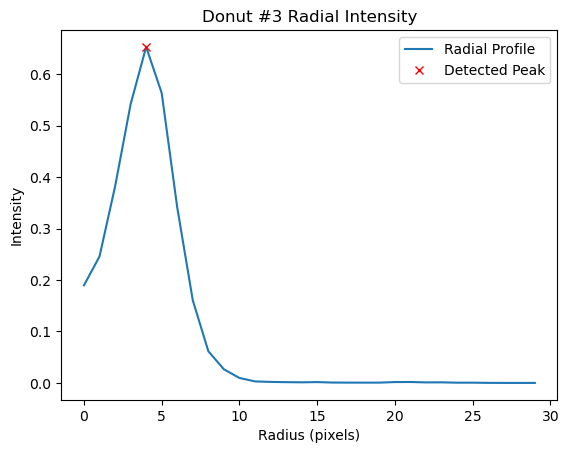

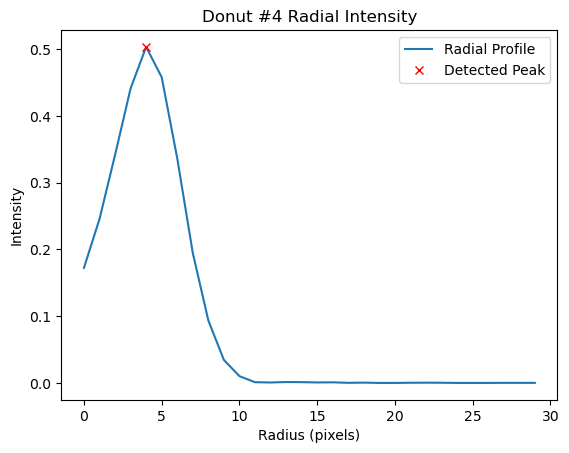

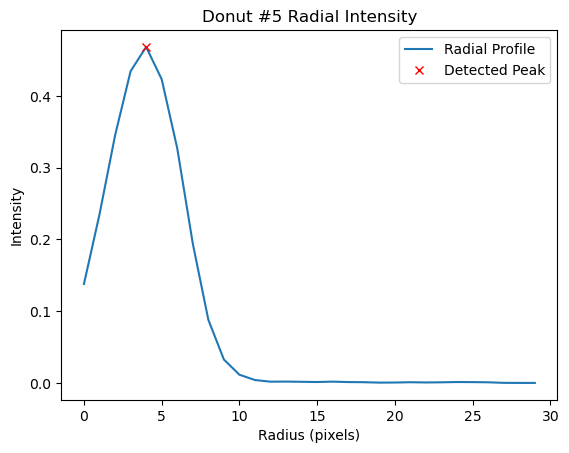

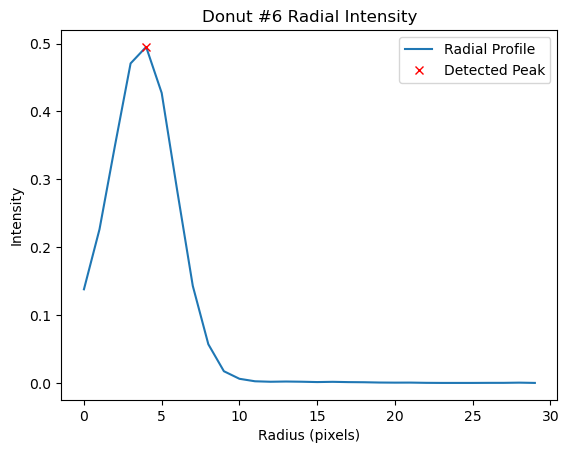

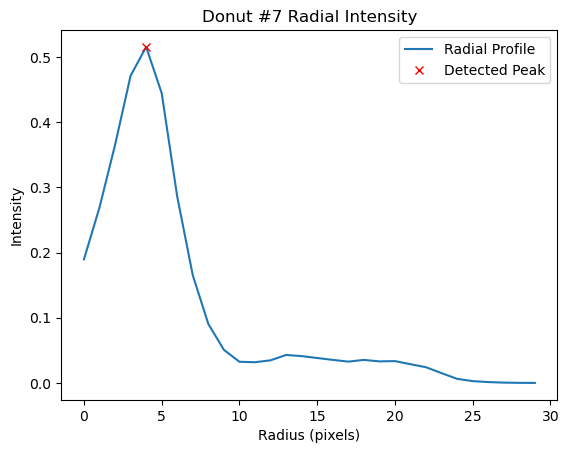

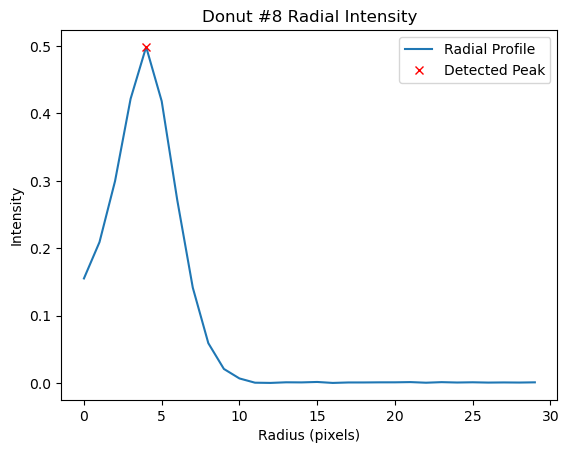

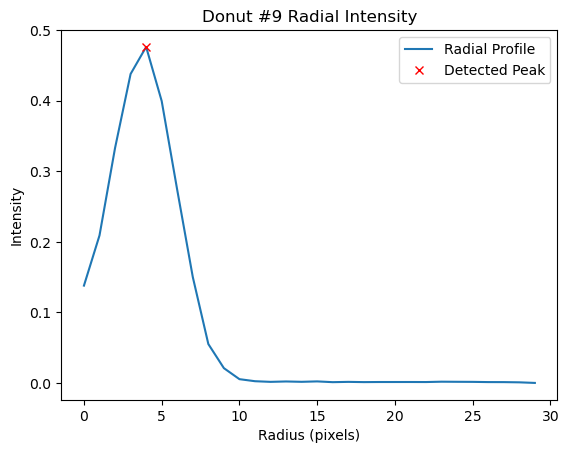

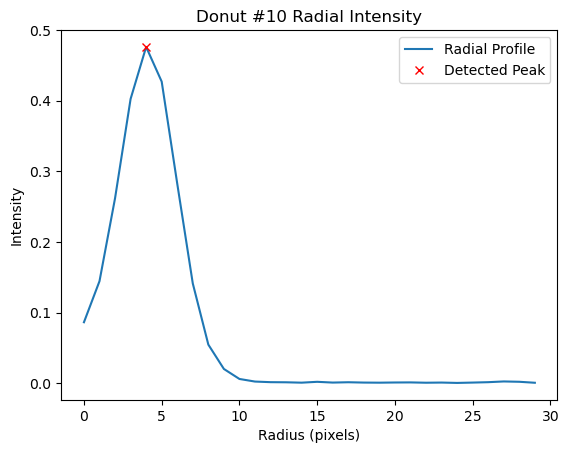

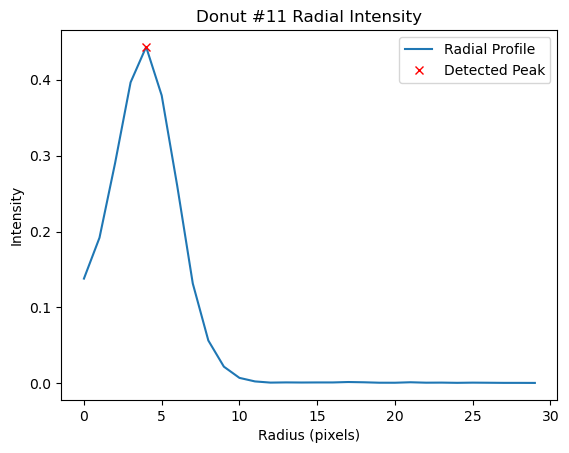

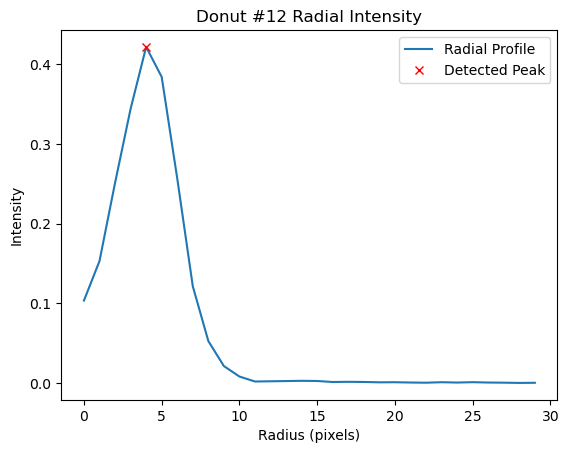

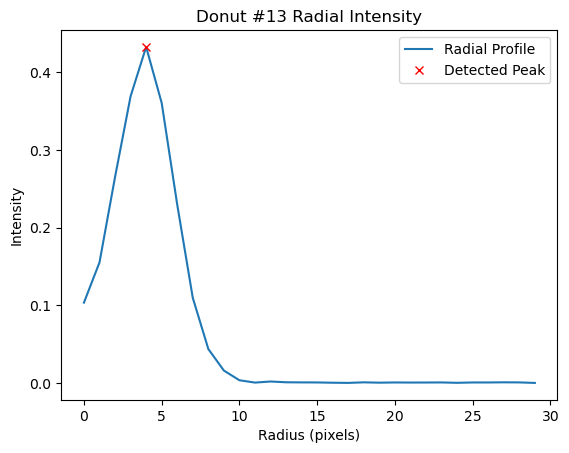

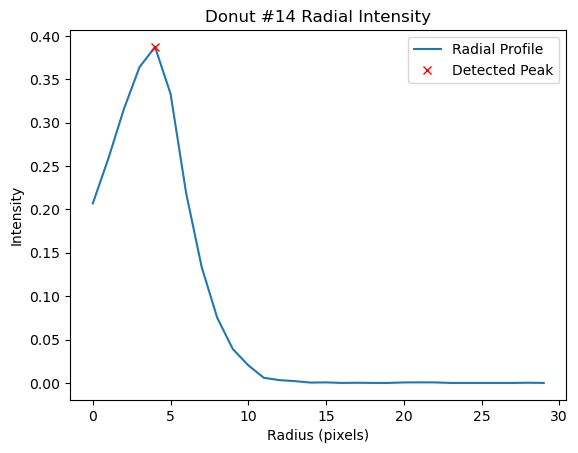

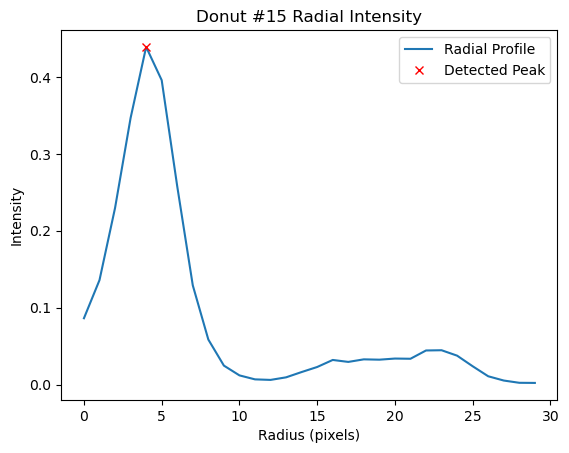

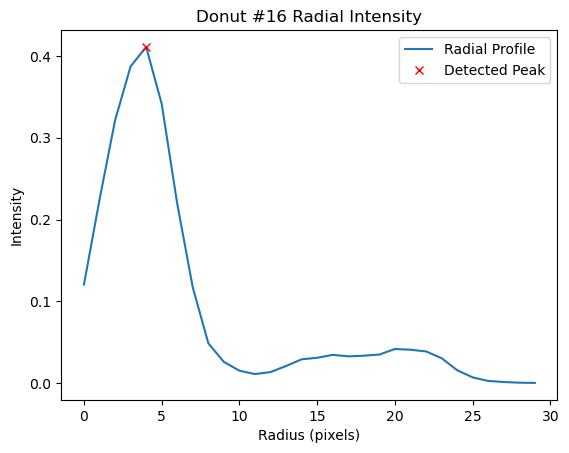

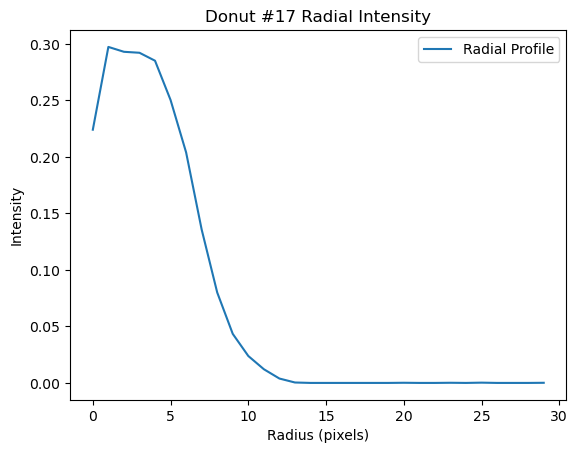

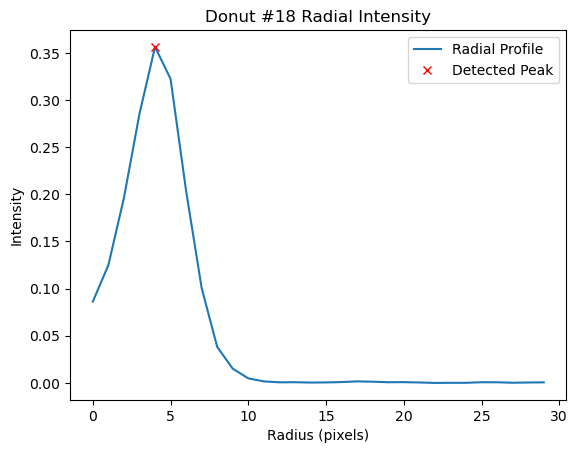

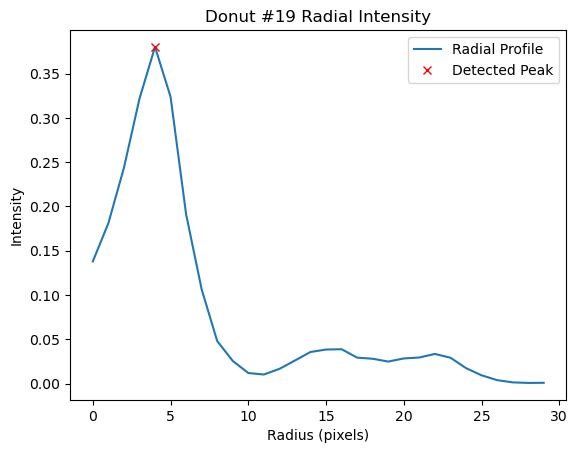

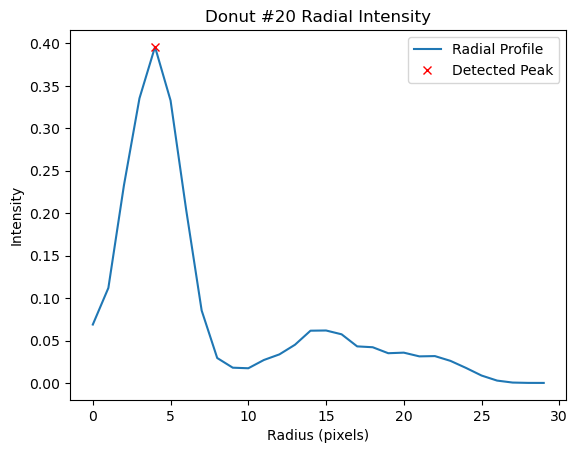

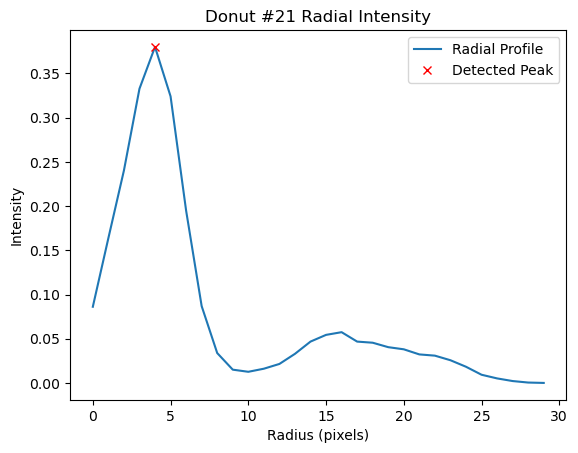

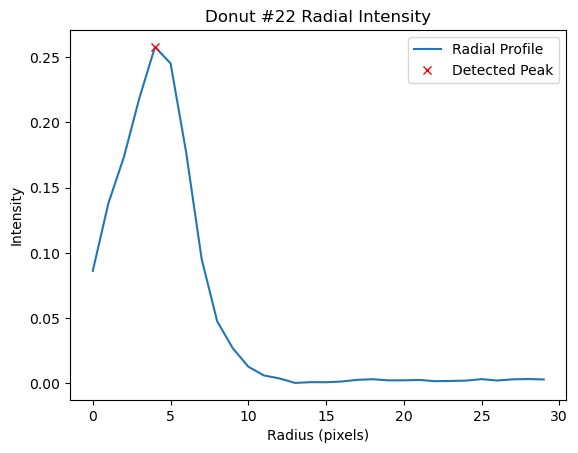

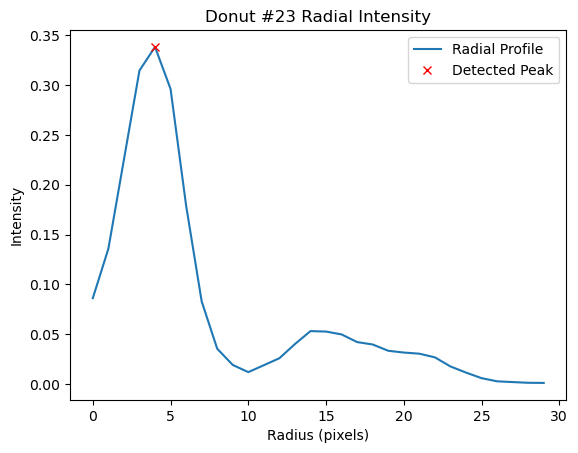

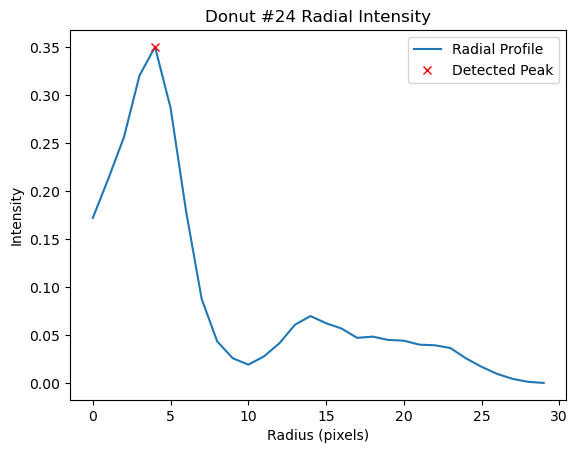

💾 Saved overlay to: C:\Users\laan\Desktop\BB slices ID5 stain\overlays\ExM_ptetWT_SR_cell17_40x_singlets_doublets_slice1_overlay.png


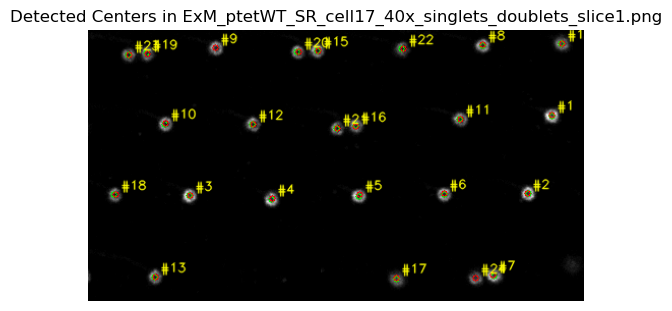

📐 Average diameter: 0.78 µm

🖼️ ExM_ptetWT_SR_cell19_40x_singlets_slice14.png: Detected 3 donuts.


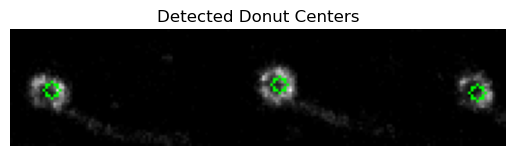

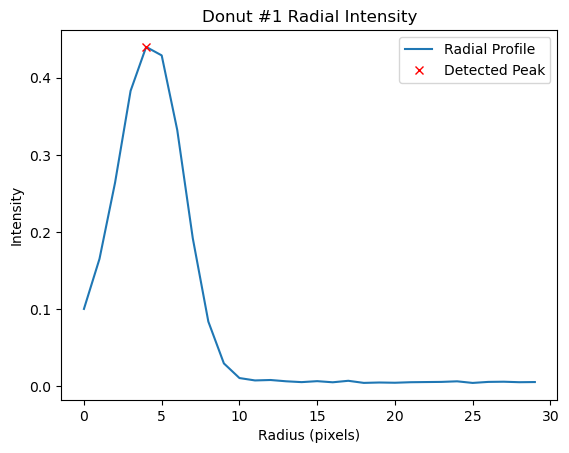

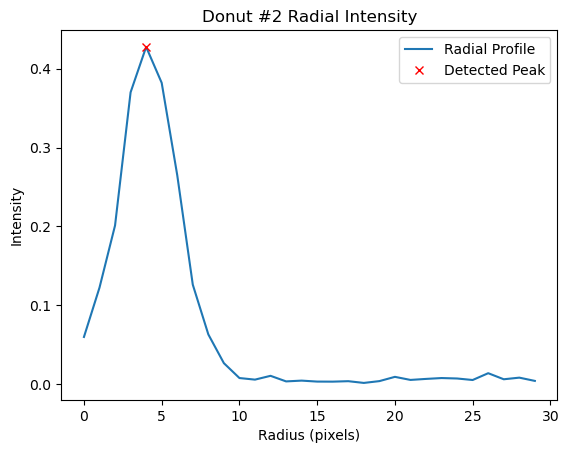

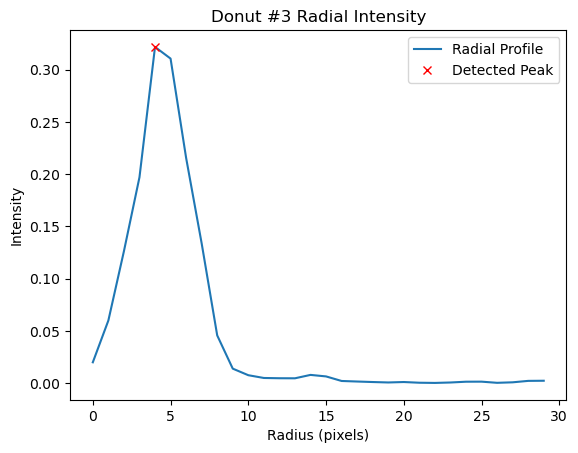

💾 Saved overlay to: C:\Users\laan\Desktop\BB slices ID5 stain\overlays\ExM_ptetWT_SR_cell19_40x_singlets_slice14_overlay.png


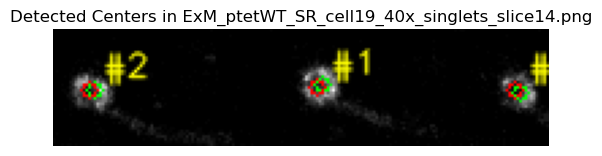

📐 Average diameter: 0.78 µm

🖼️ ExM_ptetWT_SR_cell21_40x_singlets_slice9.png: Detected 7 donuts.


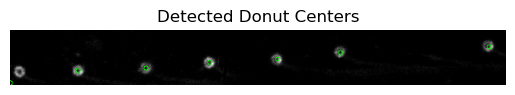

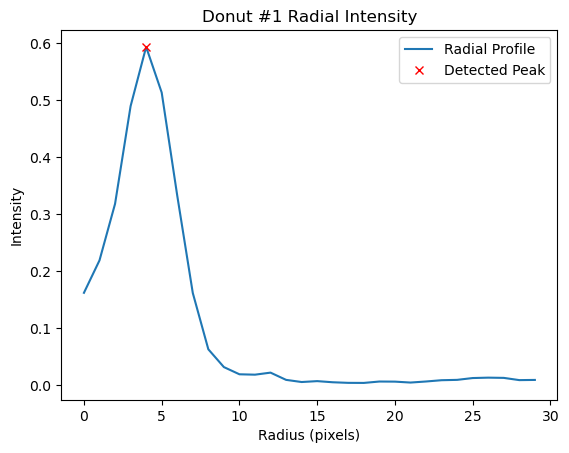

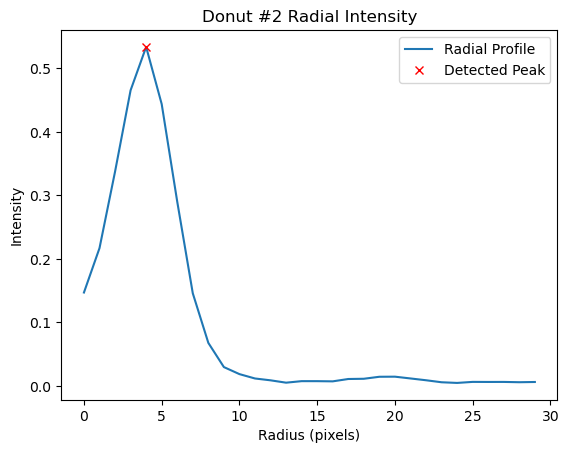

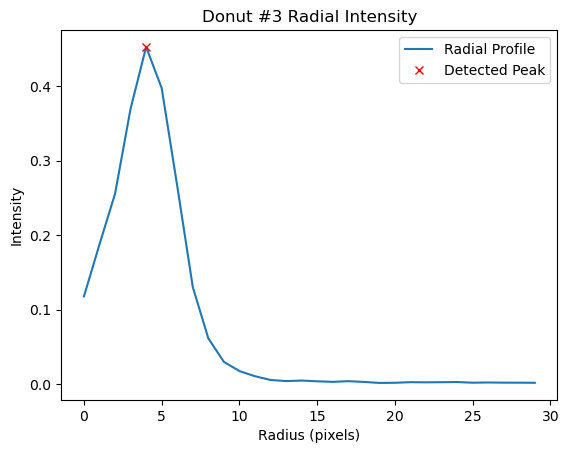

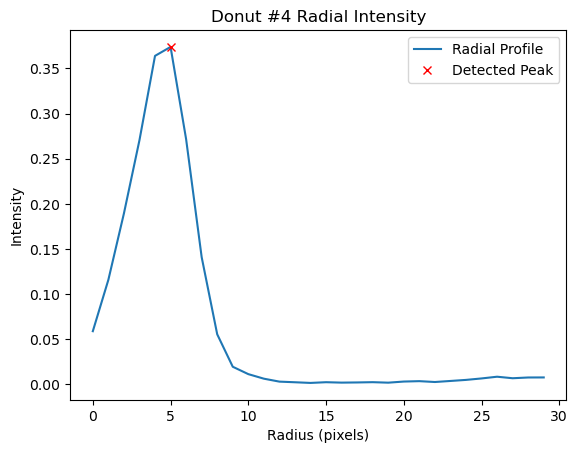

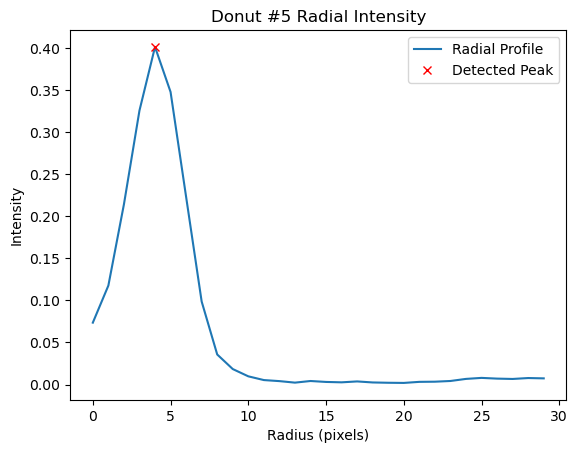

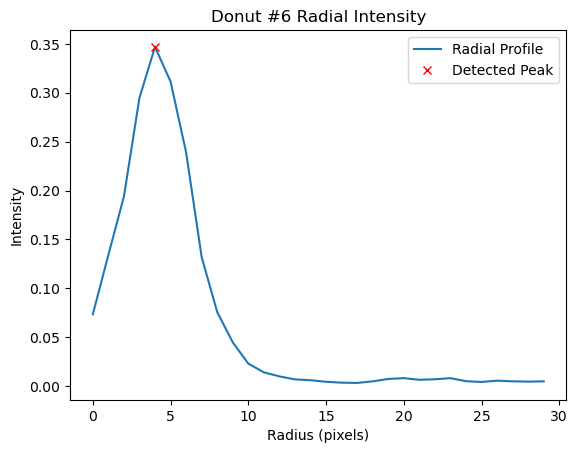

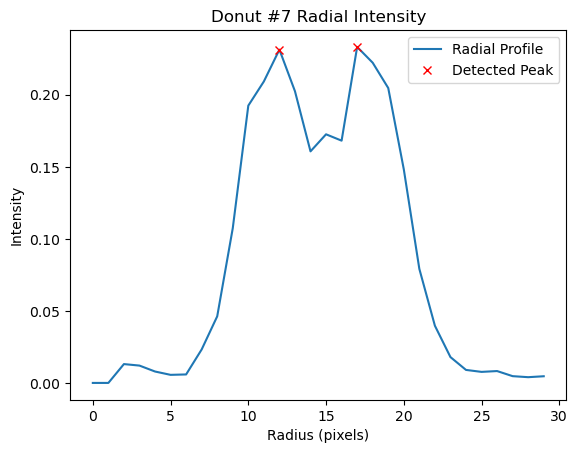

💾 Saved overlay to: C:\Users\laan\Desktop\BB slices ID5 stain\overlays\ExM_ptetWT_SR_cell21_40x_singlets_slice9_overlay.png


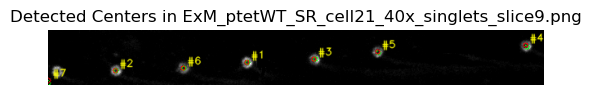

📐 Average diameter: 1.17 µm

🖼️ ExM_ptetWT_SR_cell27_40x_doublets_singlets_slice12.png: Detected 2 donuts.


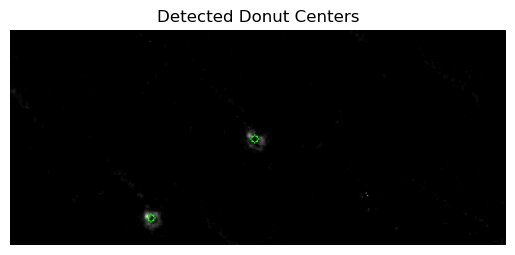

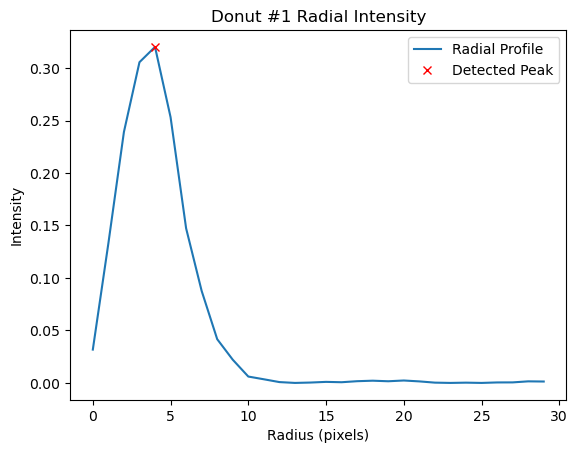

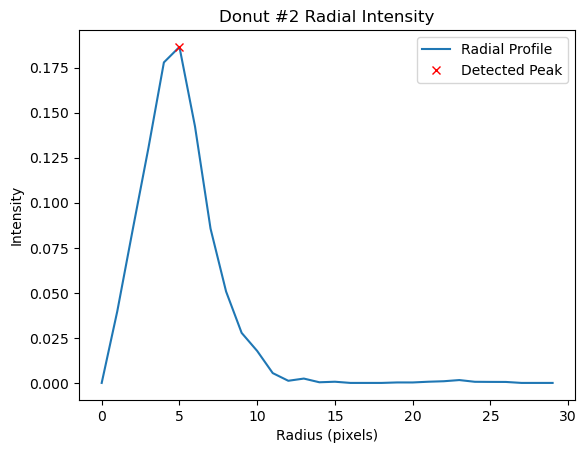

💾 Saved overlay to: C:\Users\laan\Desktop\BB slices ID5 stain\overlays\ExM_ptetWT_SR_cell27_40x_doublets_singlets_slice12_overlay.png


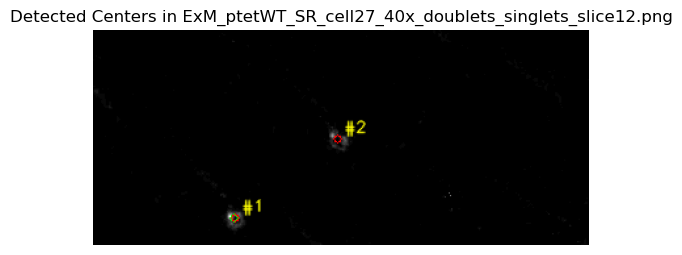

📐 Average diameter: 0.88 µm

🖼️ ExM_ptetWT_SR_cell28_40x_singlets_slice4.png: Detected 9 donuts.


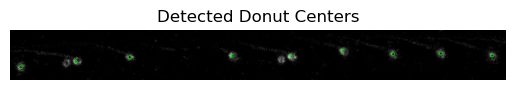

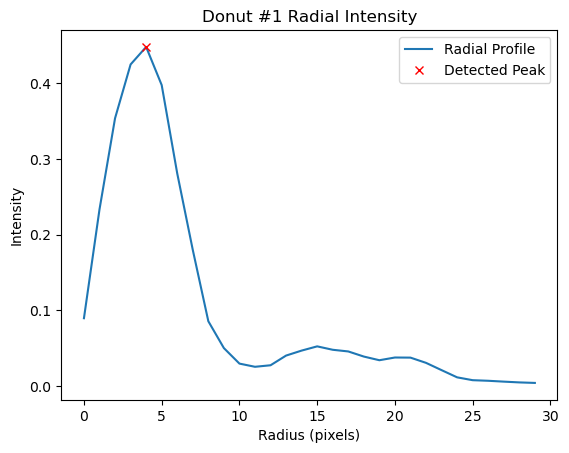

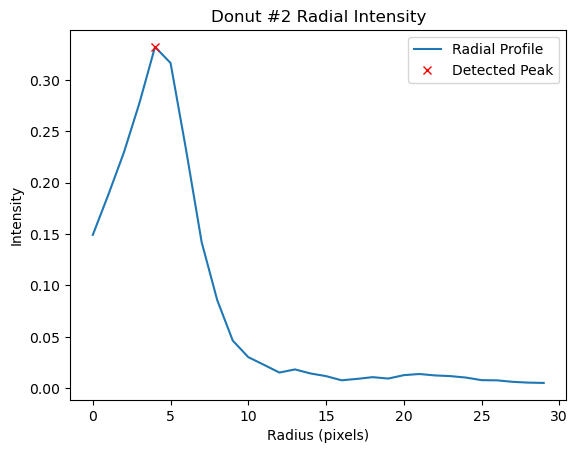

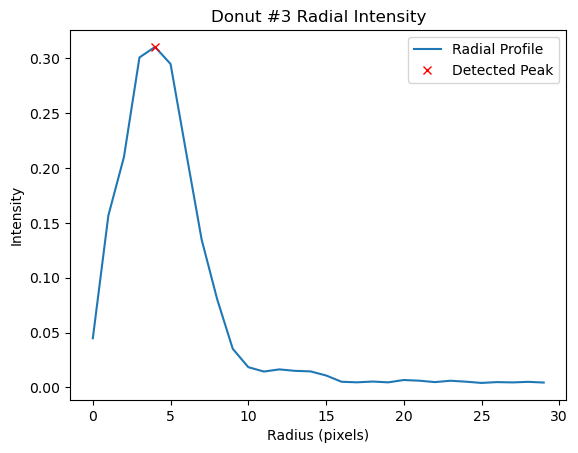

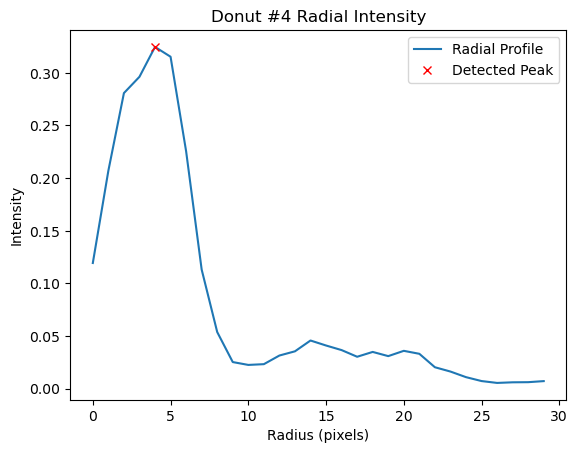

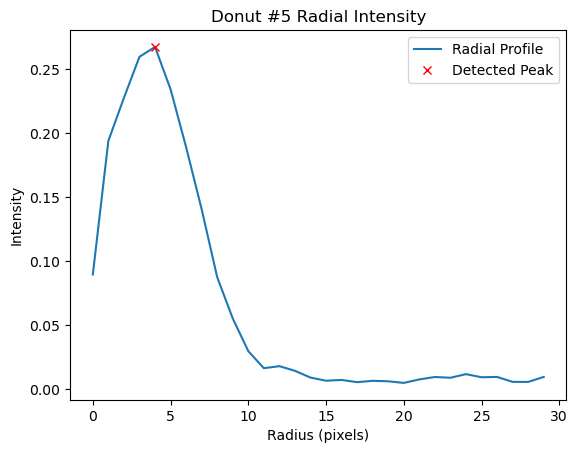

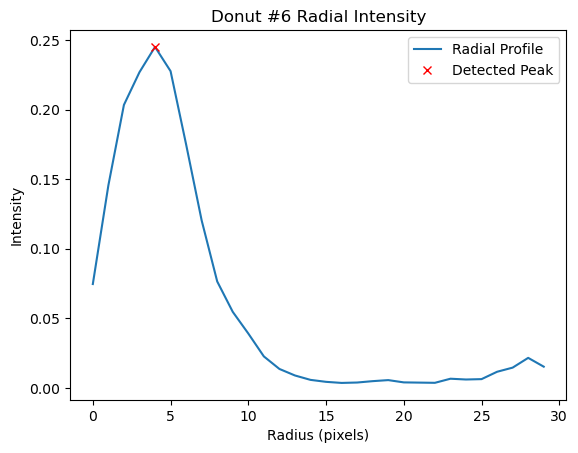

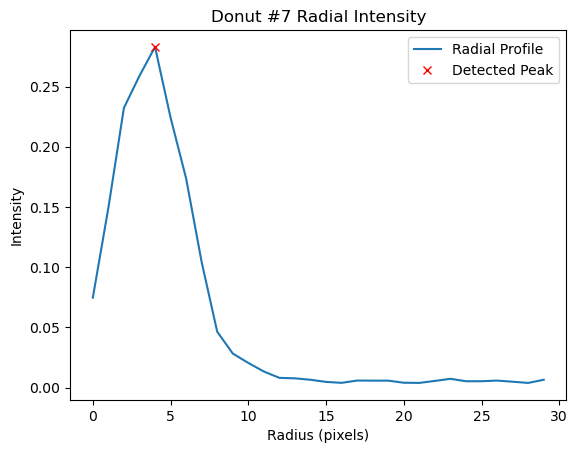

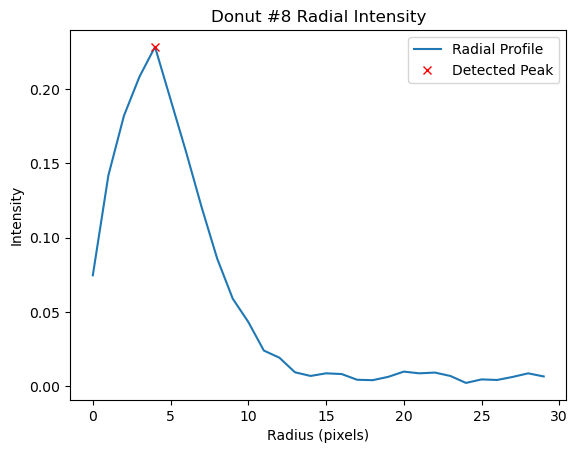

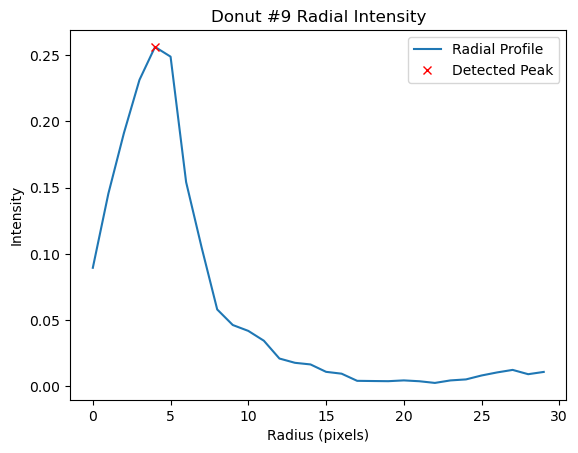

💾 Saved overlay to: C:\Users\laan\Desktop\BB slices ID5 stain\overlays\ExM_ptetWT_SR_cell28_40x_singlets_slice4_overlay.png


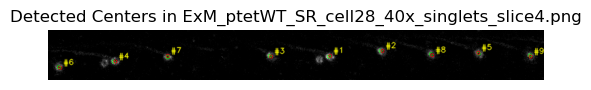

📐 Average diameter: 0.78 µm

🖼️ ExM_ptetWT_SR_cell5_40x_singlets_slice5.png: Detected 15 donuts.


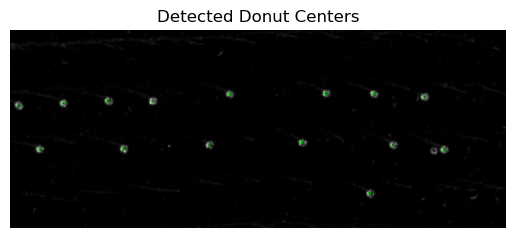

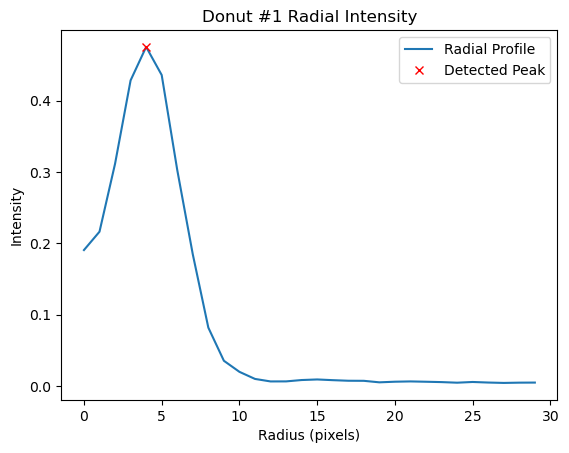

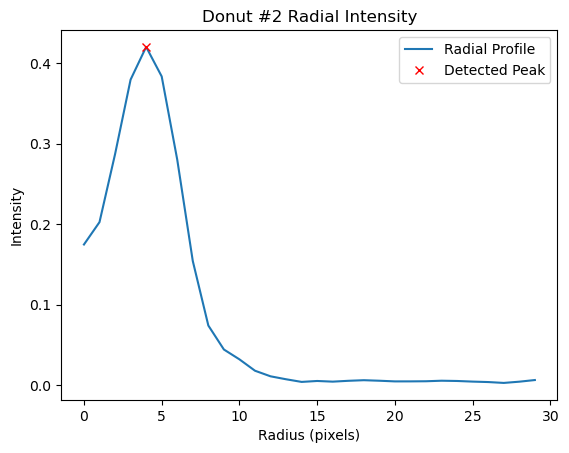

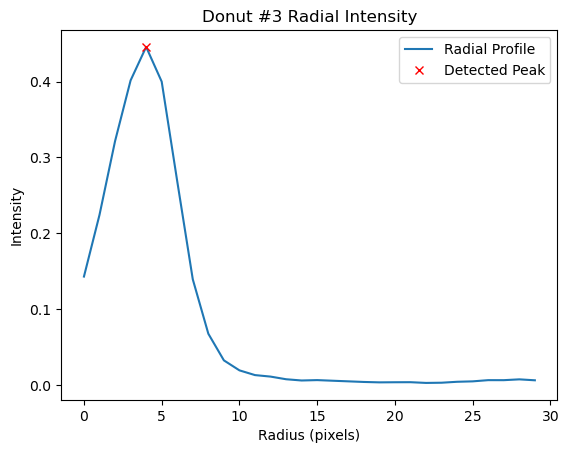

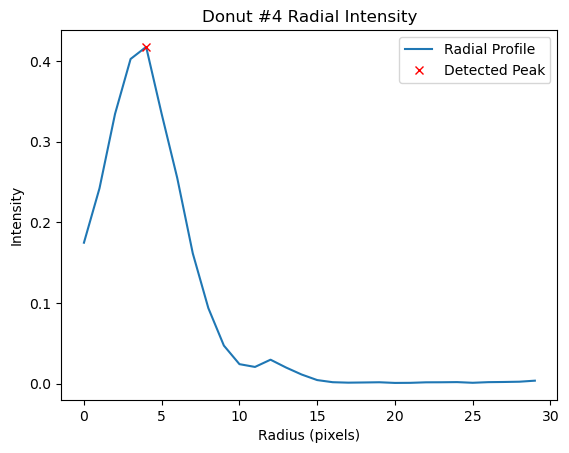

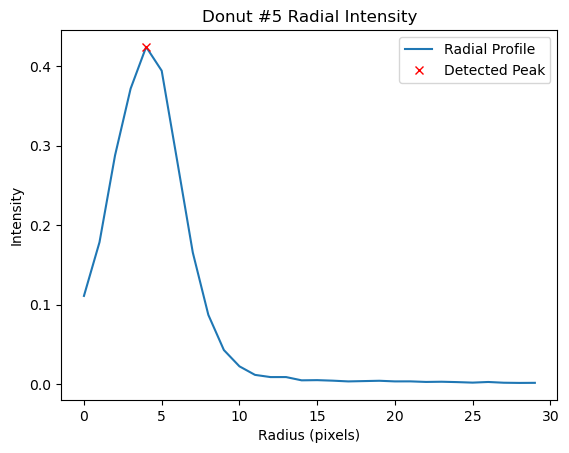

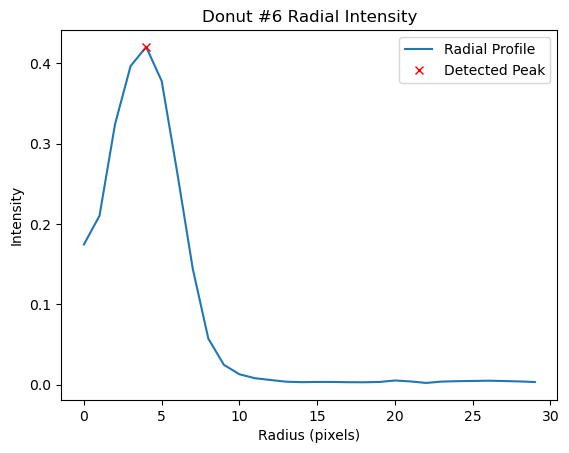

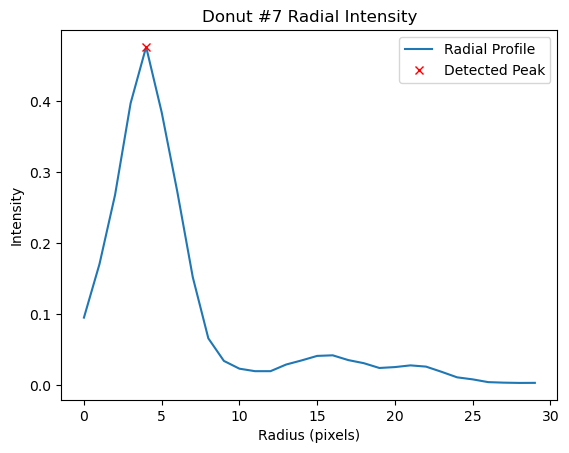

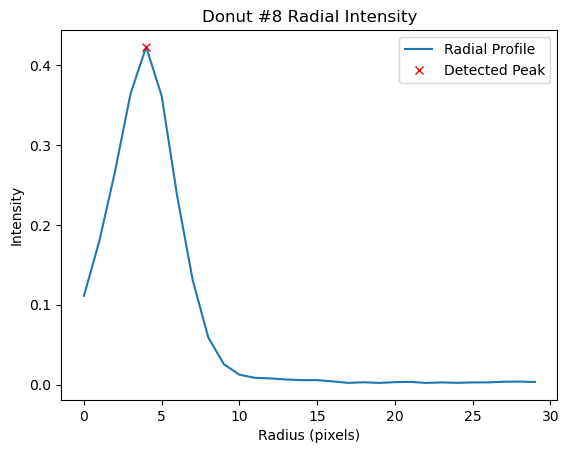

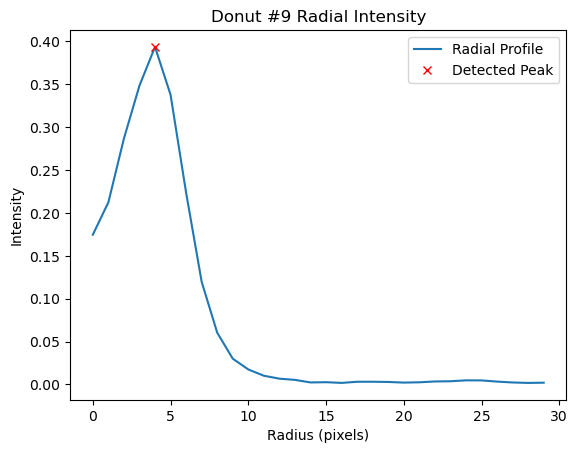

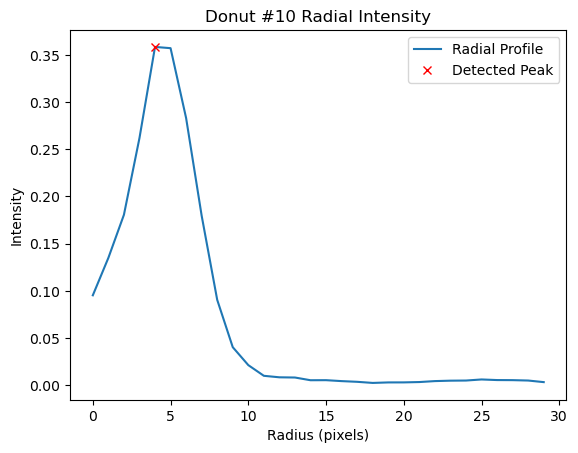

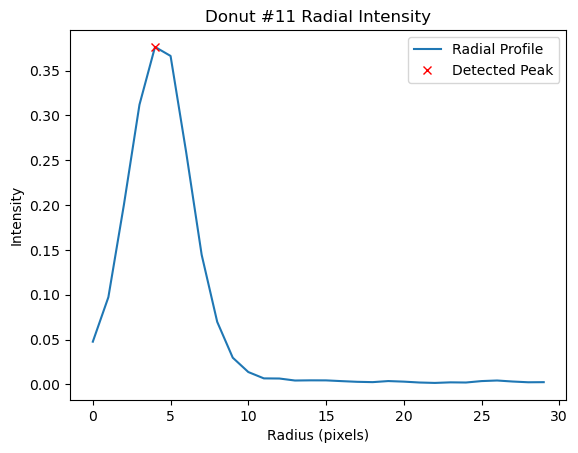

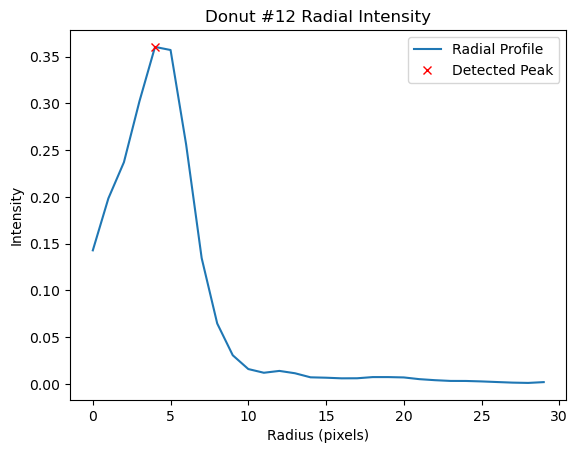

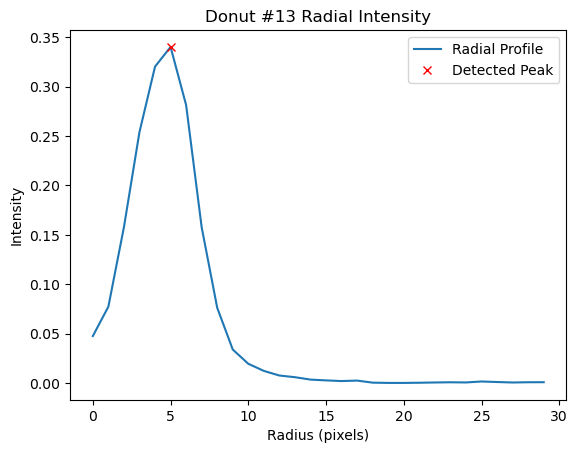

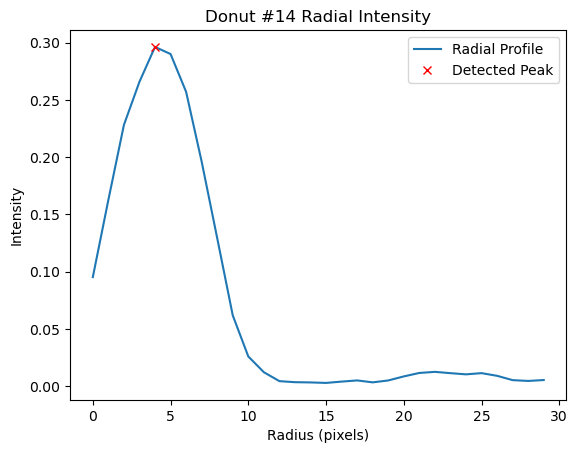

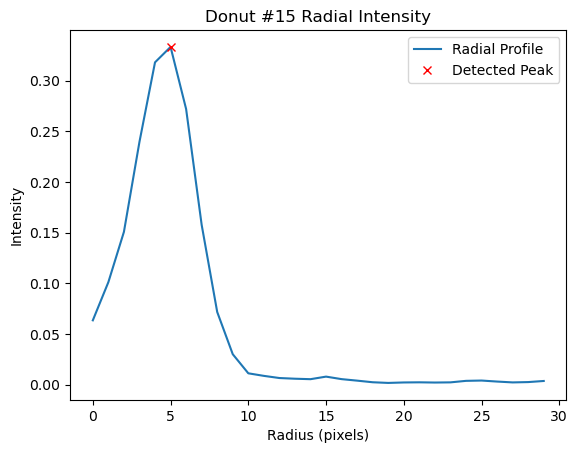

💾 Saved overlay to: C:\Users\laan\Desktop\BB slices ID5 stain\overlays\ExM_ptetWT_SR_cell5_40x_singlets_slice5_overlay.png


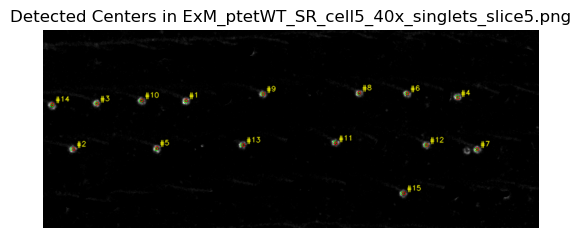

📐 Average diameter: 0.81 µm

🖼️ ExM_ptetWT_SR_cell6_40x_singlets_slice9.png: Detected 16 donuts.


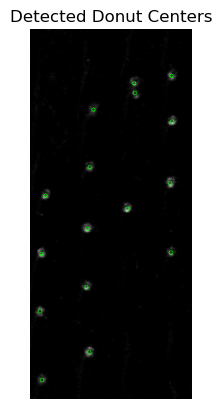

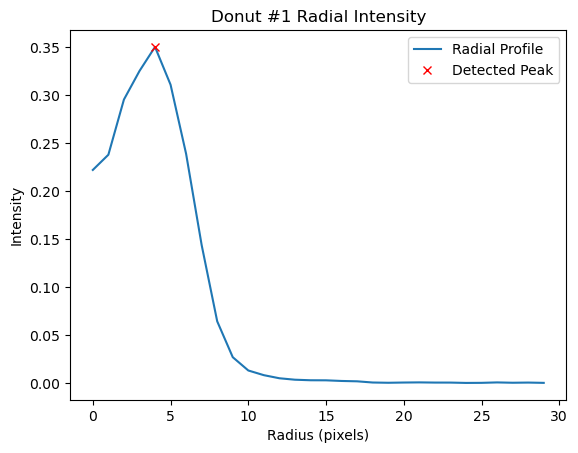

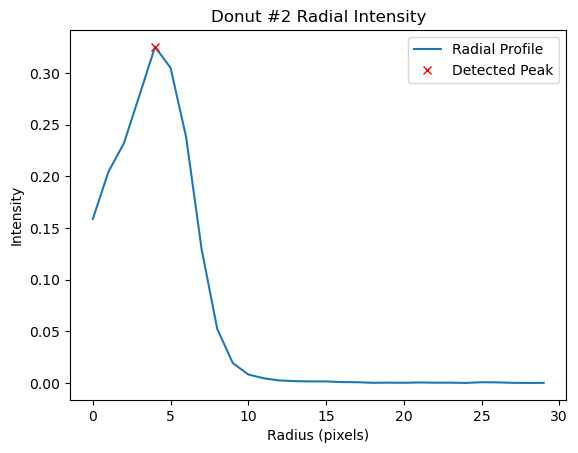

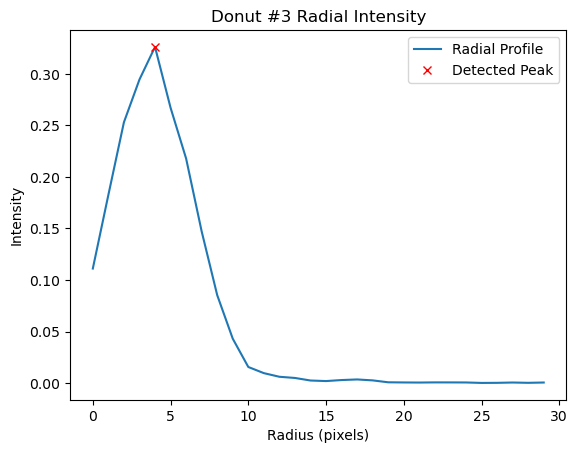

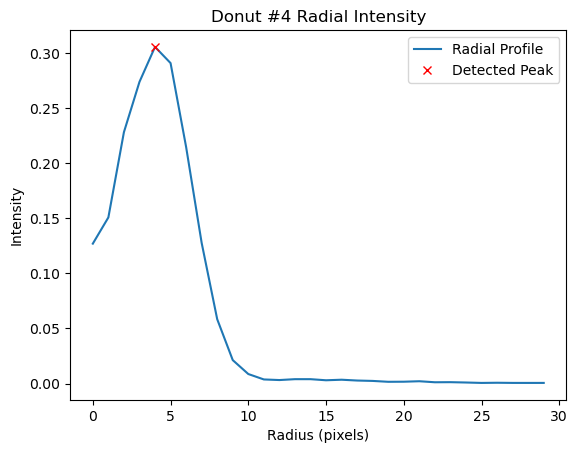

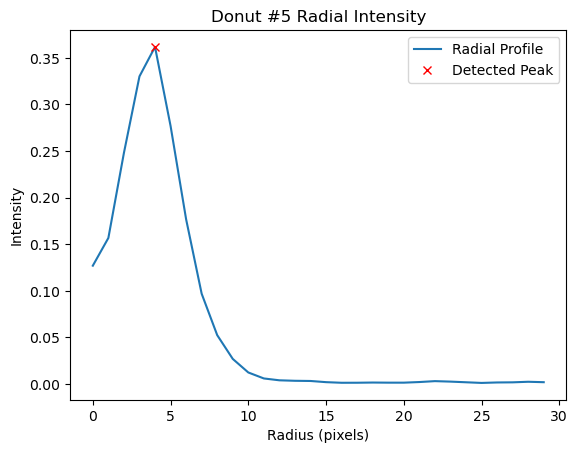

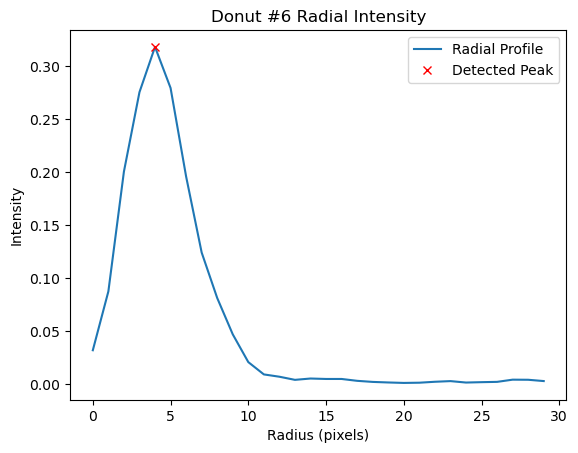

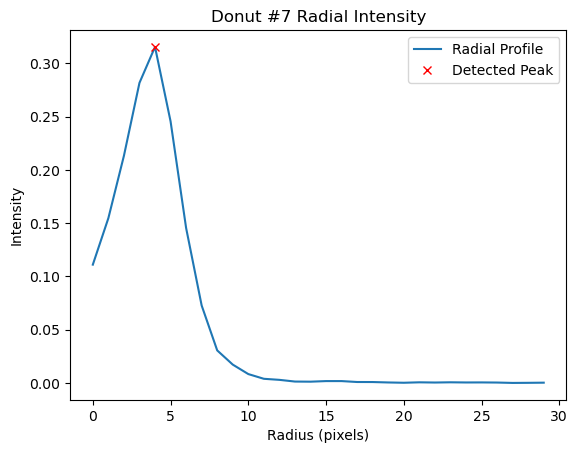

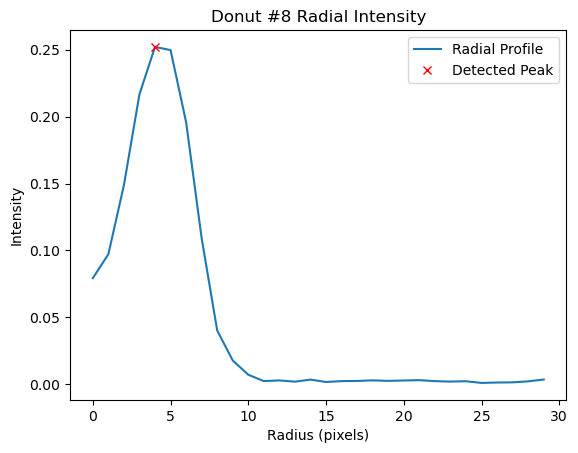

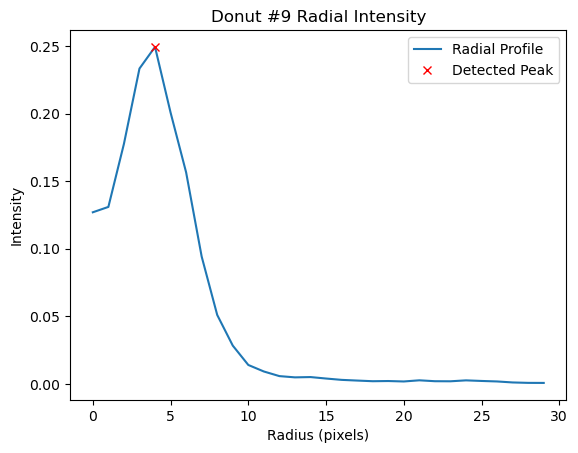

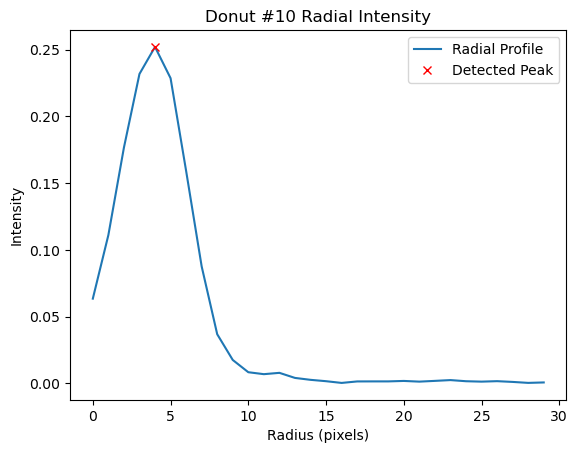

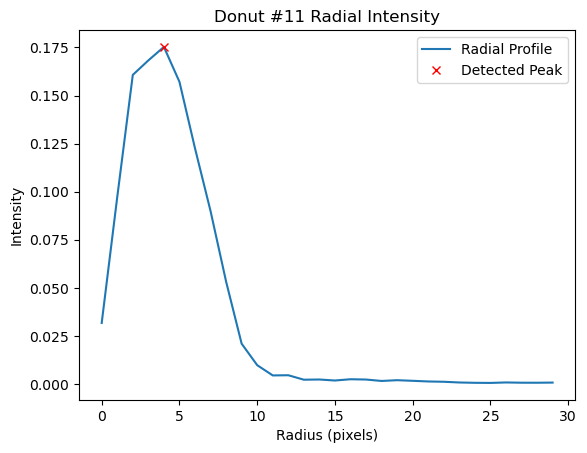

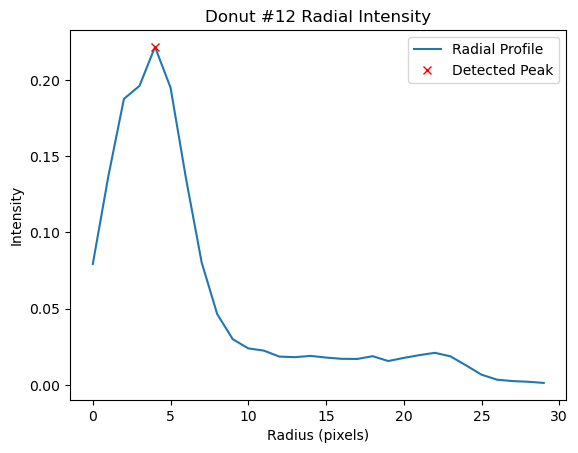

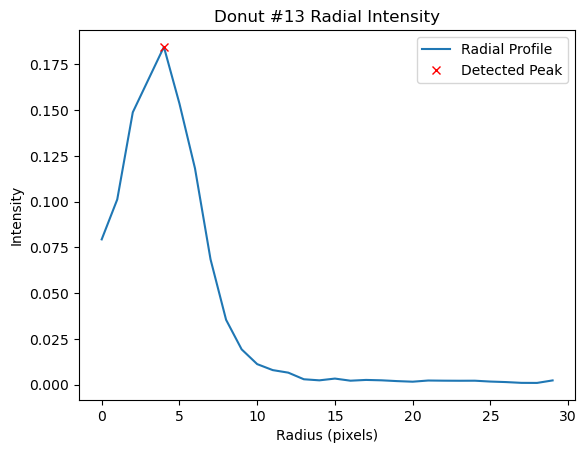

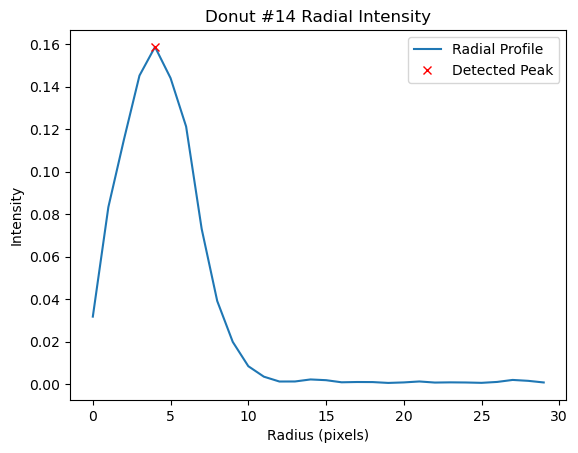

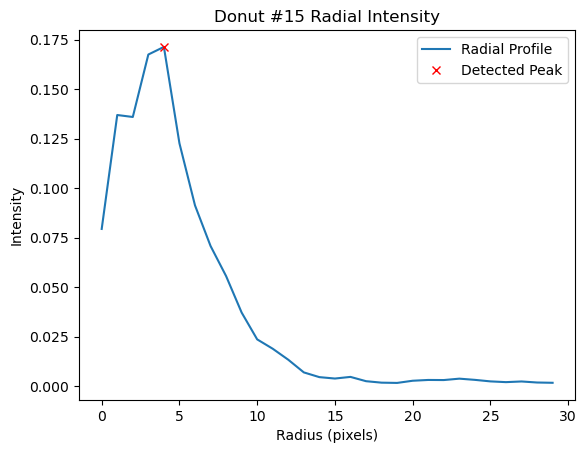

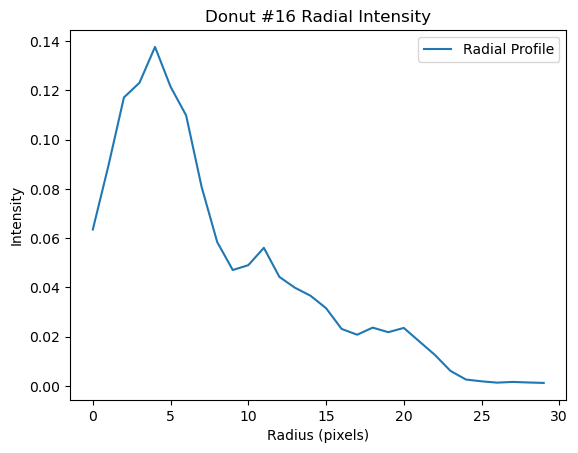

💾 Saved overlay to: C:\Users\laan\Desktop\BB slices ID5 stain\overlays\ExM_ptetWT_SR_cell6_40x_singlets_slice9_overlay.png


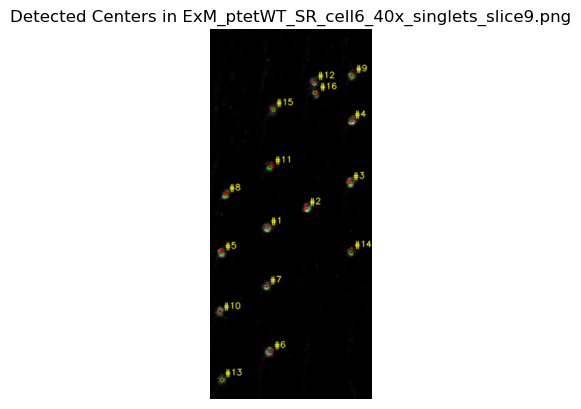

📐 Average diameter: 0.78 µm

🖼️ ExM_ptetWT_SR_cell7_40x_singlets_slice3.png: Detected 19 donuts.


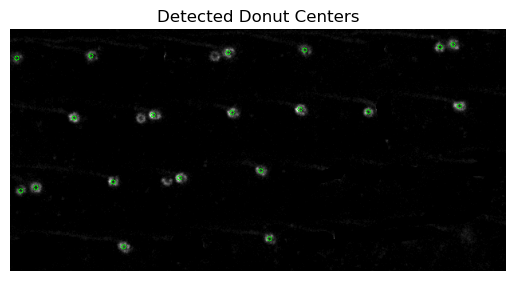

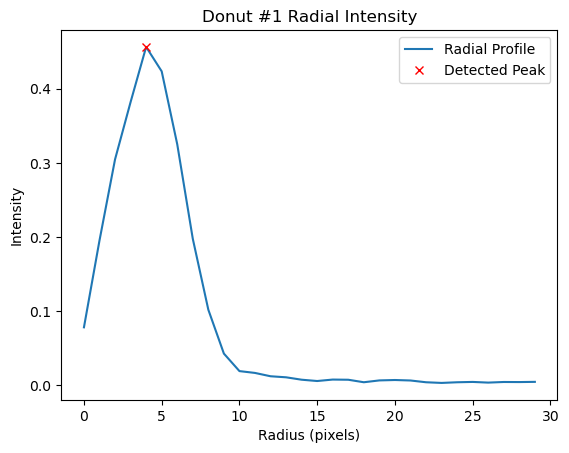

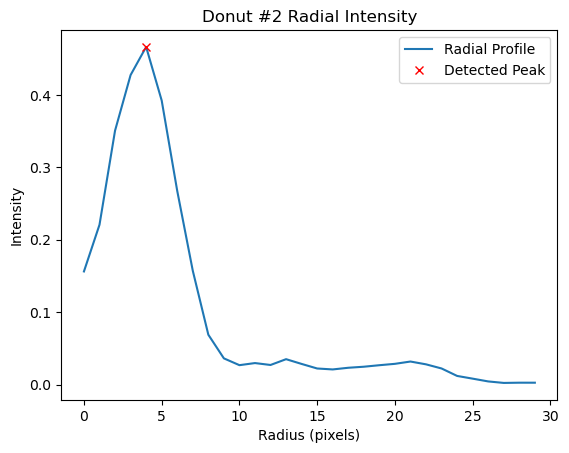

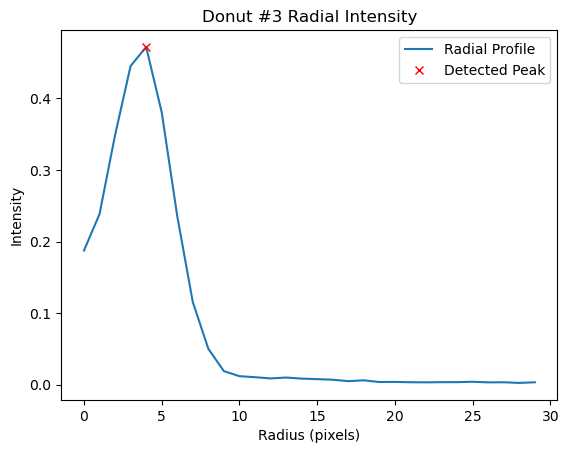

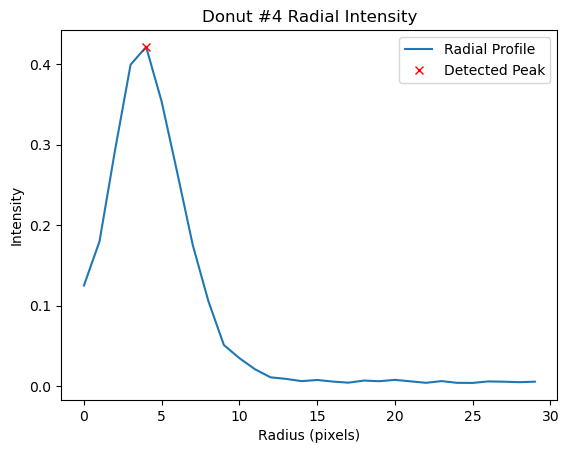

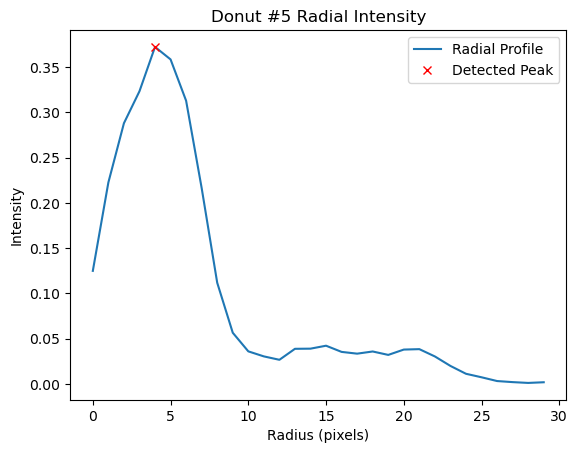

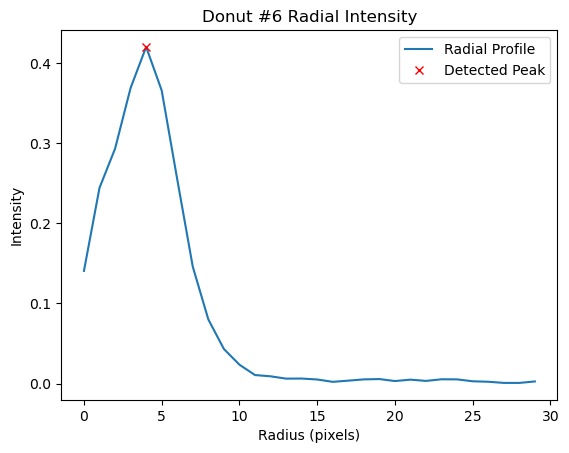

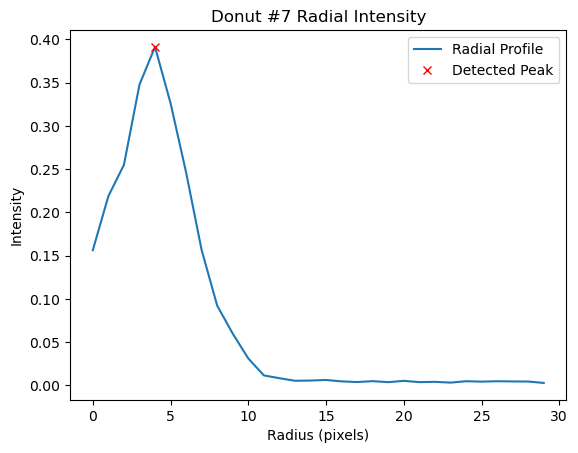

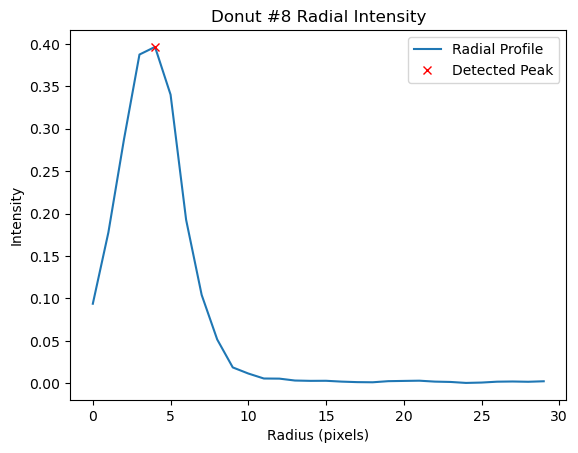

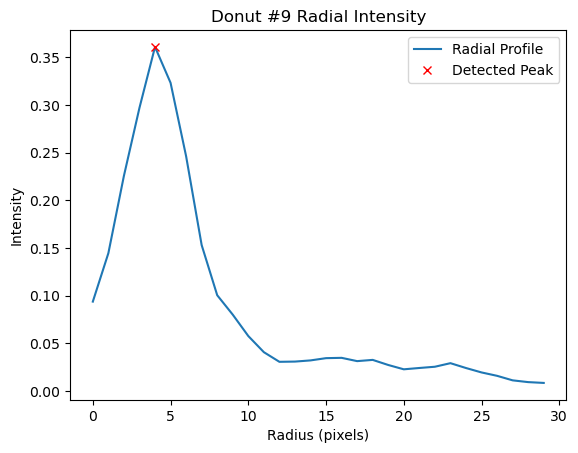

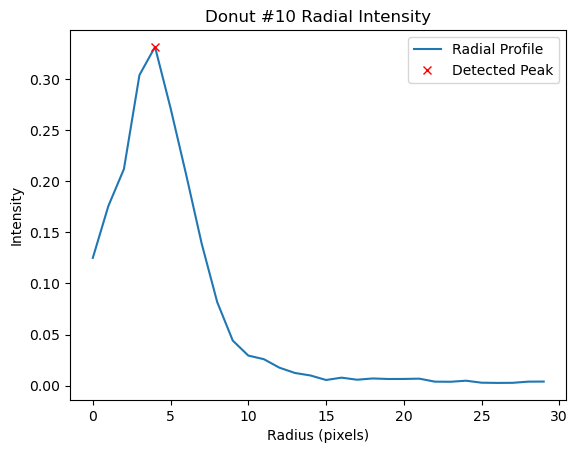

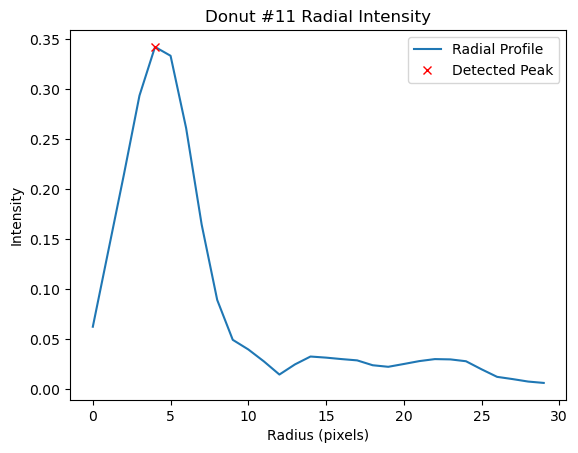

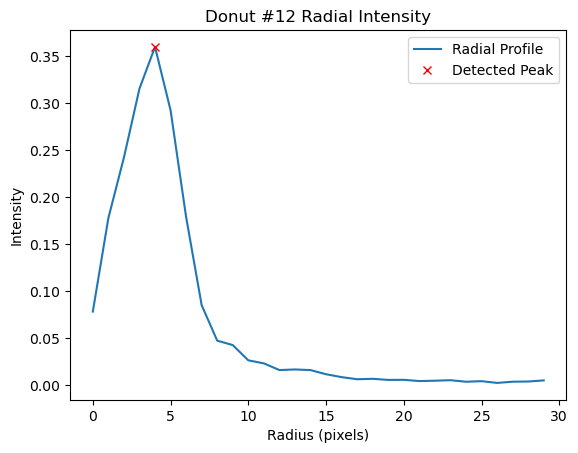

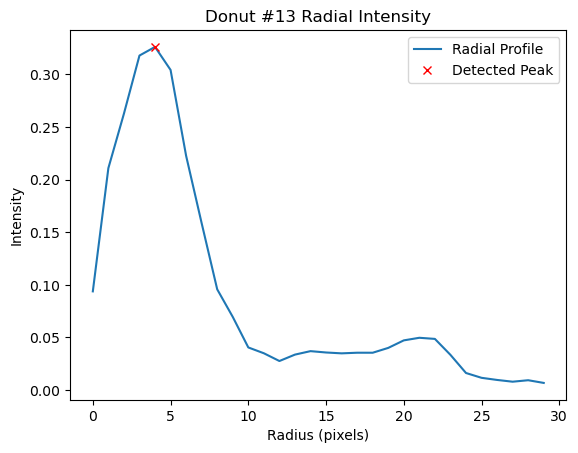

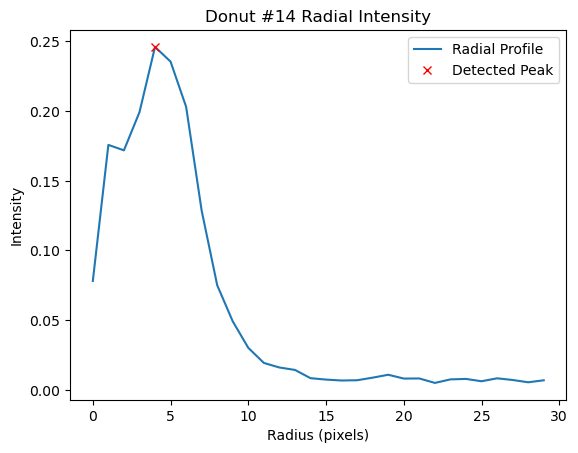

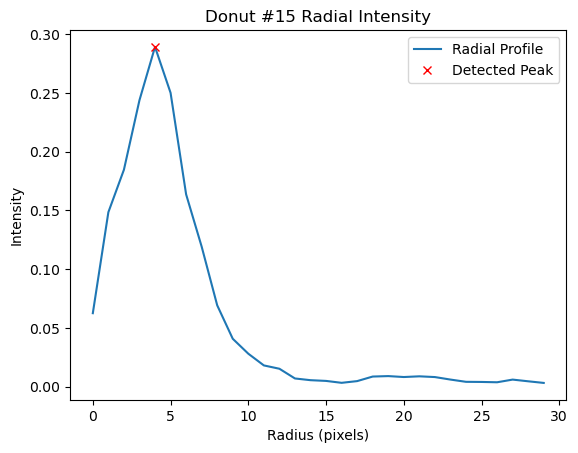

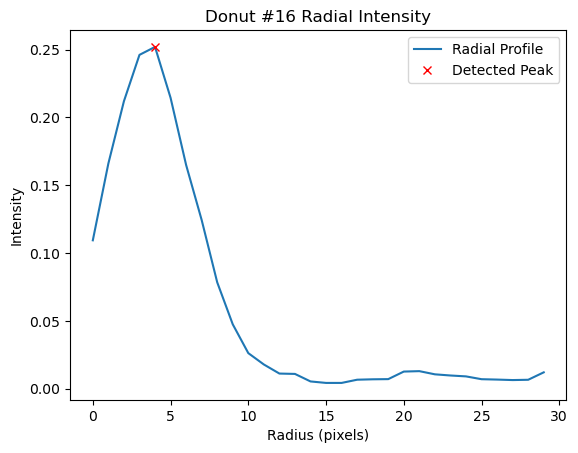

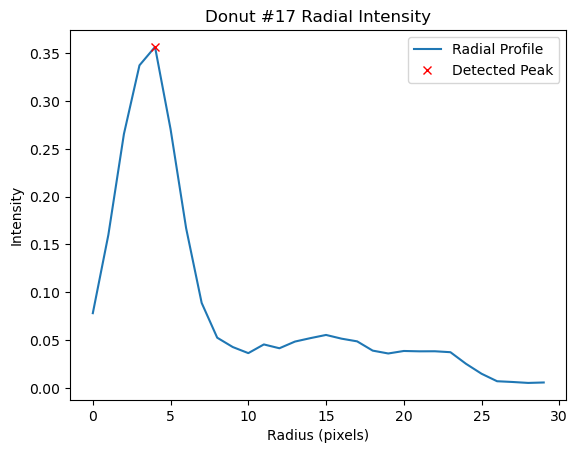

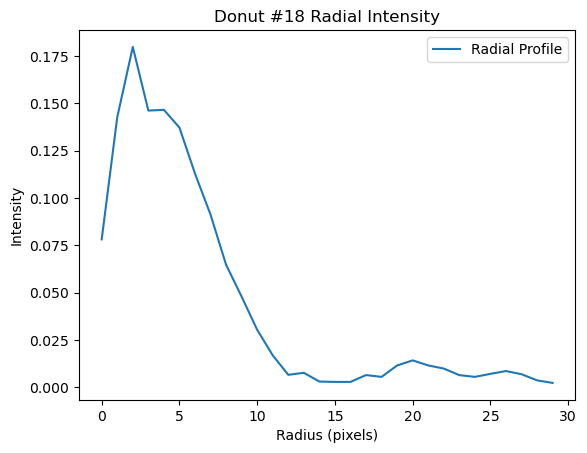

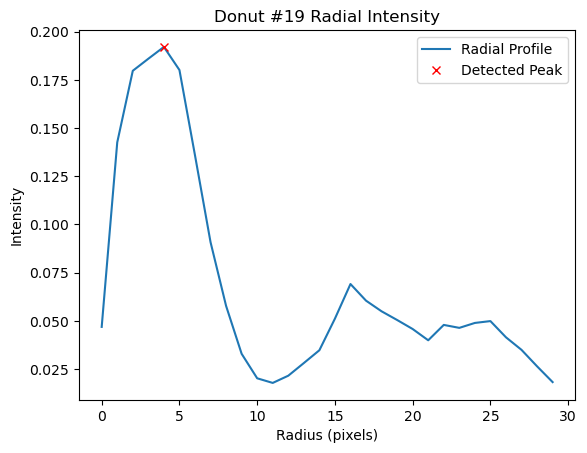

💾 Saved overlay to: C:\Users\laan\Desktop\BB slices ID5 stain\overlays\ExM_ptetWT_SR_cell7_40x_singlets_slice3_overlay.png


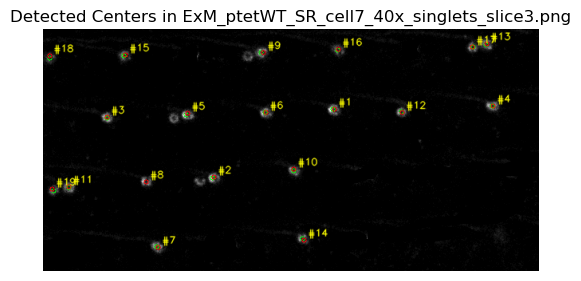

📐 Average diameter: 0.78 µm

🖼️ ExM_ptetWT_SR_cell8_40x_singlets_slice7.png: Detected 9 donuts.


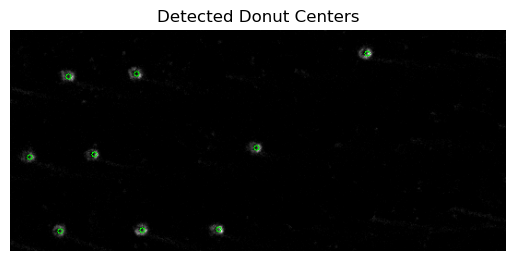

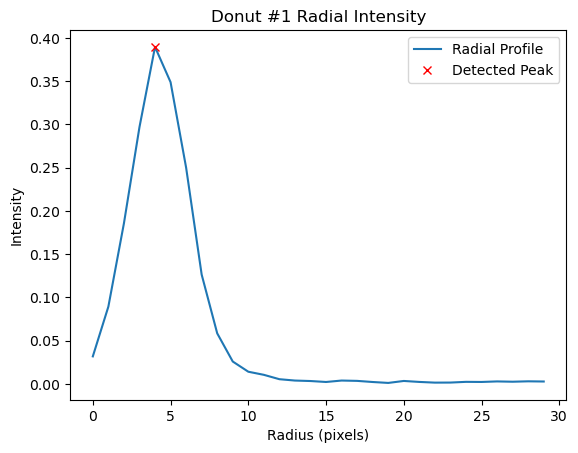

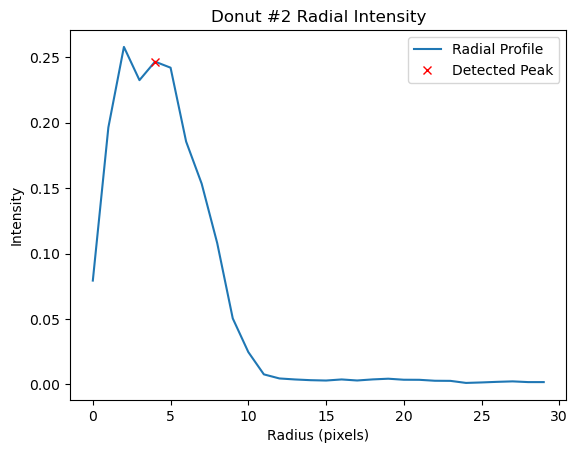

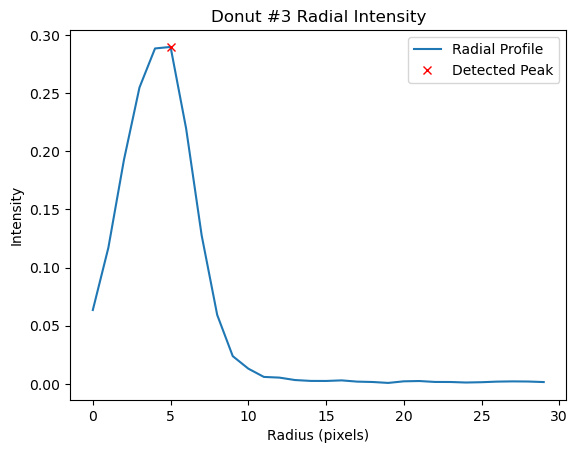

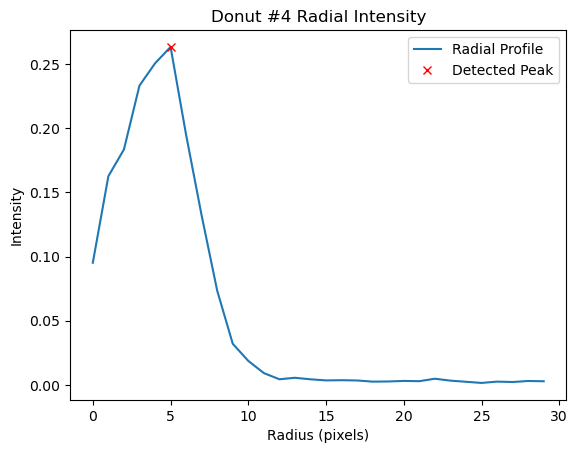

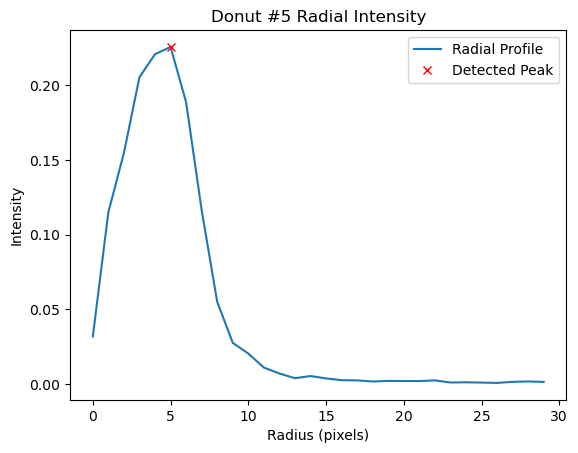

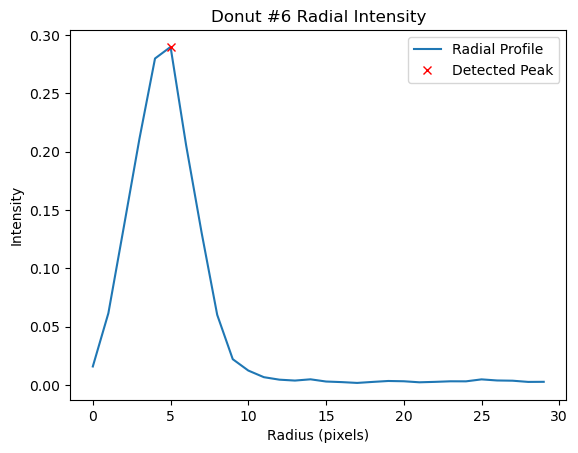

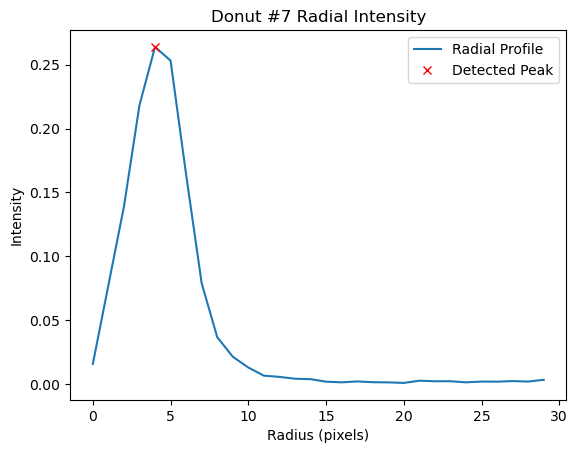

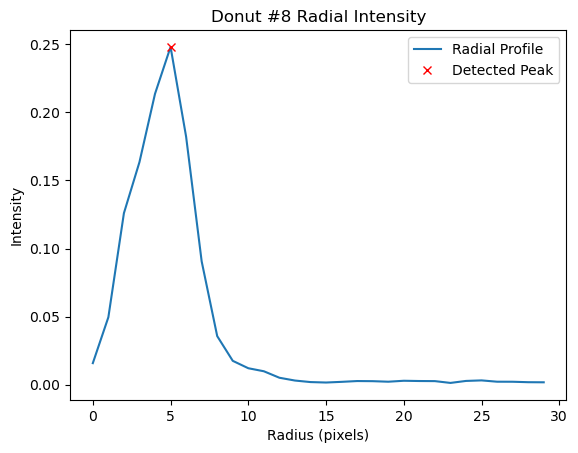

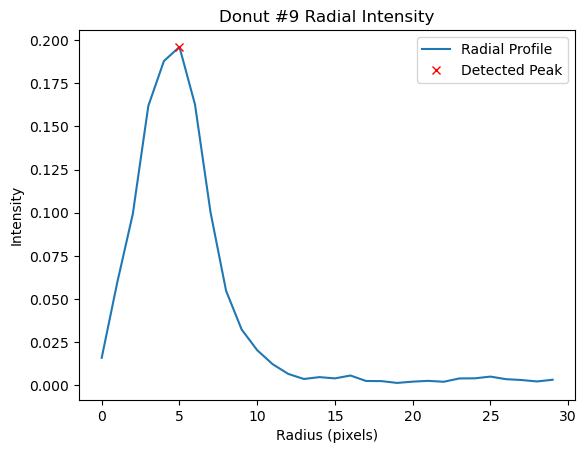

💾 Saved overlay to: C:\Users\laan\Desktop\BB slices ID5 stain\overlays\ExM_ptetWT_SR_cell8_40x_singlets_slice7_overlay.png


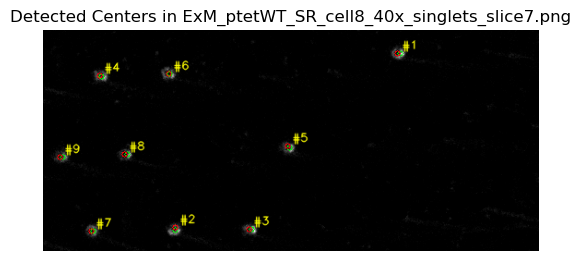

📐 Average diameter: 0.91 µm

🖼️ ExM_ptetWT_SR_cell9_40x_singlets_slice10.png: Detected 3 donuts.


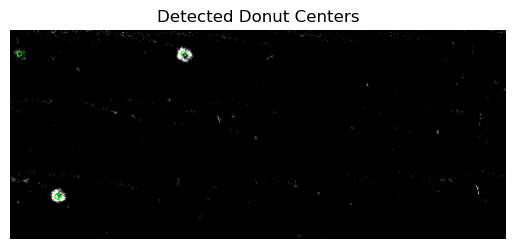

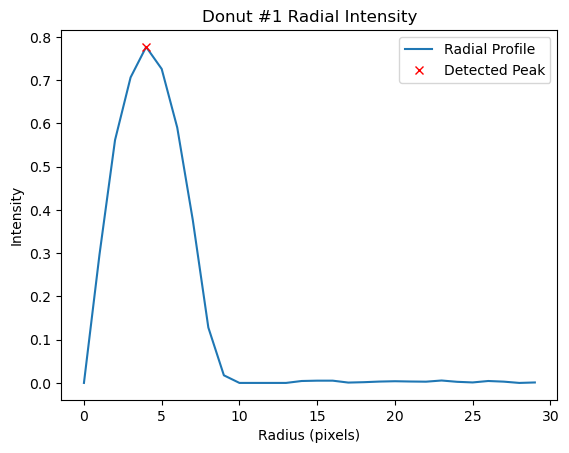

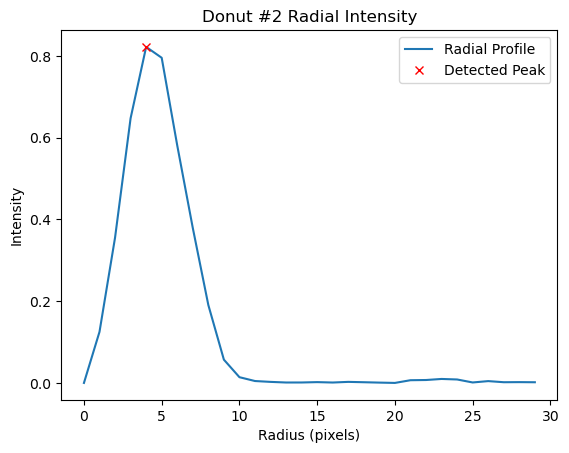

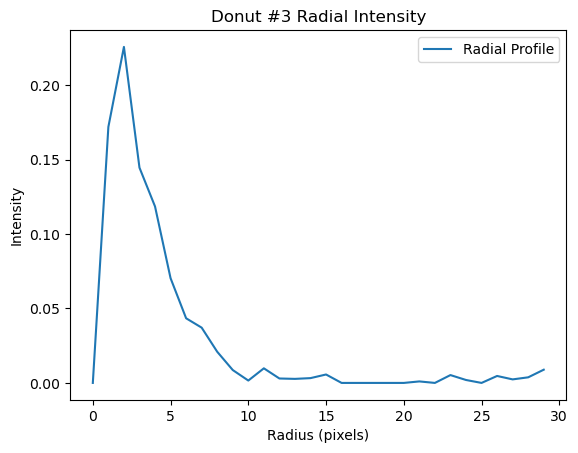

💾 Saved overlay to: C:\Users\laan\Desktop\BB slices ID5 stain\overlays\ExM_ptetWT_SR_cell9_40x_singlets_slice10_overlay.png


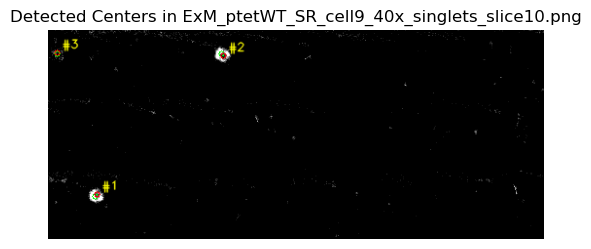

📐 Average diameter: 0.78 µm

✅ Summary of image measurements:
📌 Images processed: 13
📐 Overall average diameter: 0.85 µm
📉 Standard error of the mean (SEM): ±0.03 µm


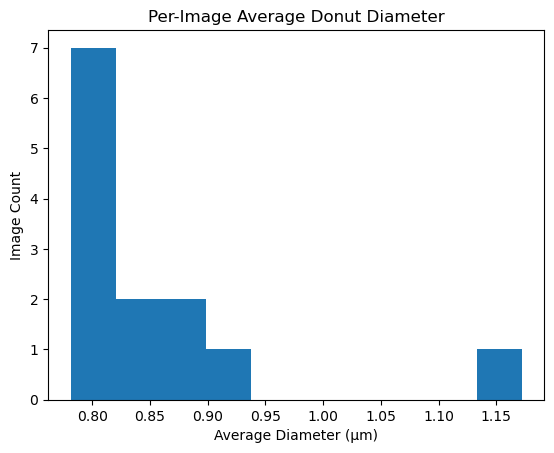

💾 Saved per-donut diameters to all_donut_diameters.csv
💾 Saved image summary to summary_results.csv


In [ ]:
# Code to detect and measure BB sizes in high resolution ExM images

image_avg_diameters = []  # µm
all_results = []
summary_results = []
USE_REFINED_CENTER = True  # 🔀 Toggle to use refined (min intensity) center

# --- 🔄 Process each image ---
for img, fname in zip(images, filenames):
    img_norm = cv2.normalize(img, None, 0, 1.0, cv2.NORM_MINMAX, cv2.CV_32F)
    image_results = []  # To store per-donut results

    blobs = blob_log(
        img_norm,
        min_sigma=8,
        max_sigma=20,
        num_sigma=10,
        # threshold=0.1 # SR images atto tub stain
        threshold=0.05 # Centrin images (polyE) & ID5 staining
        # threshold=0.2  # Aparna's images
    )

    print(f"\n🖼️ {fname}: Detected {len(blobs)} donuts.")

    # --- 🖼️ Overlay centers ---
    img_rgb = cv2.cvtColor((img_norm * 255).astype(np.uint8), cv2.COLOR_GRAY2RGB)
    for y, x, r in blobs:
        cv2.circle(img_rgb, (int(x), int(y)), 3, (0, 255, 0), 1)

    plt.imshow(img_rgb)
    plt.title("Detected Donut Centers")
    plt.axis('off')
    plt.show()


    diameters_um = []
    img_rgb = cv2.cvtColor((img_norm * 255).astype(np.uint8), cv2.COLOR_GRAY2RGB)

    for i, blob in enumerate(blobs):
        y, x, r = blob
        x, y = int(x), int(y)

        # --- Default to blob center ---
        center_x, center_y = int(blob[1]), int(blob[0])

        # --- Optionally refine to local min intensity ---
        if USE_REFINED_CENTER:
            patch_size = 7  # Must be odd, eg 7x7 to keep local
            half = patch_size // 2

            x_min = max(0, center_x - half)
            x_max = min(img_norm.shape[1], center_x + half + 1)
            y_min = max(0, center_y - half)
            y_max = min(img_norm.shape[0], center_y + half + 1)

            patch = img_norm[y_min:y_max, x_min:x_max]

            # Build coordinate grid relative to center
            coords_y, coords_x = np.indices(patch.shape)
            coords_x += x_min
            coords_y += y_min
            dists = np.sqrt((coords_x - center_x)**2 + (coords_y - center_y)**2)

            # Mask only pixels within 3 pixels distance
            mask = dists <= 3
            patch_masked = patch.copy()
            patch_masked[~mask] = np.max(patch) + 1  # Hide outside area with high value

            # Now get minimum in masked patch
            min_idx = np.unravel_index(np.argmin(patch_masked), patch.shape)
            center_y = y_min + min_idx[0]
            center_x = x_min + min_idx[1]

        # --- Plot both centers for visual inspection ---
        # Draw original and refined centers
        cv2.circle(img_rgb, (x, y), 3, (0, 255, 0), 1)                # Original (green)
        cv2.circle(img_rgb, (center_x, center_y), 3, (255, 0, 0), 1)  # Refined (red)

        # Label donut number near refined center
        label_pos = (center_x + 5, center_y - 5)  # offset text to avoid overlap
        cv2.putText(
            img_rgb,
            f"#{i+1}",
            label_pos,
            fontFace=cv2.FONT_HERSHEY_SIMPLEX,
            fontScale=0.4,
            color=(255, 255, 0),  # yellow text
            thickness=1,
            lineType=cv2.LINE_AA
        )

        # --- Radial profile from chosen center ---
        profile = radial_profile(img_norm, center=(center_x, center_y), max_radius=30)
        # profile = radial_profile(img_norm, center=(x, y), max_radius=30)  # original center of object instead of min intensity point 
        peaks, _ = find_peaks(profile, height=0.15, prominence=0.01)
        peaks = peaks[peaks >= 4] # Only keep peaks at least 3 pixels from center
        
        # Plot profile
        plt.figure()
        plt.plot(profile, label='Radial Profile')
        if len(peaks):
            plt.plot(peaks, profile[peaks], "rx", label='Detected Peak')
        plt.title(f"Donut #{i+1} Radial Intensity")
        plt.xlabel("Radius (pixels)")
        plt.ylabel("Intensity")
        plt.legend()
        plt.show()

        # --- Measure diameter ---        
        if len(peaks) >= 1:
            main_peak = peaks[np.argmax(profile[peaks])]
            diameter_px = 2 * main_peak
            diameter_um = diameter_px / PIXELS_PER_MICRON
            diameters_um.append(diameter_um)

            image_results.append({
                "image": fname,
                "donut_index": i+1,
                "diameter_px": diameter_px,
                "diameter_um": diameter_um
            })

    # Show overlay image with all centers
    plt.imshow(img_rgb)
    plt.title(f"Detected Centers in {fname}")
    plt.axis('off')
    out_path = os.path.join(OVERLAY_DIR, f"{os.path.splitext(fname)[0]}_overlay.png")
    plt.savefig(out_path, bbox_inches='tight', dpi=150)
    print(f"💾 Saved overlay to: {out_path}")
    plt.show()

    all_results.extend(image_results)
    summary_results.append({
        "image": fname,
        "n_donuts": len(diameters_um),
        "avg_diameter_um": np.mean(diameters_um) if diameters_um else np.nan,
        "std_diameter_um": np.std(diameters_um) if diameters_um else np.nan
    })

    if diameters_um:
        avg_diameter = np.mean(diameters_um)
        image_avg_diameters.append(avg_diameter)
        print(f"📐 Average diameter: {avg_diameter:.2f} µm")
    else:
        print("⚠️ No usable donuts found.")

# --- 📊 Final Summary ---
if image_avg_diameters:
    overall_avg = np.mean(image_avg_diameters)
    sem = np.std(image_avg_diameters, ddof=1) / np.sqrt(len(image_avg_diameters))

    print("\n✅ Summary of image measurements:")
    print(f"📌 Images processed: {len(image_avg_diameters)}")
    print(f"📐 Overall average diameter: {overall_avg:.2f} µm")
    print(f"📉 Standard error of the mean (SEM): ±{sem:.2f} µm")

    # Plot histogram of per-image averages
    plt.hist(image_avg_diameters, bins=10)
    plt.title("Per-Image Average Donut Diameter")
    plt.xlabel("Average Diameter (µm)")
    plt.ylabel("Image Count")
    plt.show()
else:
    print("\n❌ No donuts measured in any image.")


# Save per-donut CSV
df_all = pd.DataFrame(all_results)
df_all.to_csv(os.path.join(image_folder, "all_donut_diameters.csv"), index=False)
print("💾 Saved per-donut diameters to all_donut_diameters.csv")

# Save summary CSV
df_summary = pd.DataFrame(summary_results)
if image_avg_diameters:
    df_summary.loc[len(df_summary.index)] = {
        "image": "OVERALL_AVERAGE",
        "n_donuts": np.sum(df_summary['n_donuts']),
        "avg_diameter_um": overall_avg,
        "std_diameter_um": sem
    }
df_summary.to_csv(os.path.join(image_folder, "summary_results.csv"), index=False)
print("💾 Saved image summary to summary_results.csv")